# **Telecom Customer Churn Prediction**

กลุ่ม (2)

ปุรวิศร์ ลัทธิประสาธน์  6642076826

วทัญญู รอดถนอม 6642101826

อิสรีย์ ตันติคุณพันธ์ 6642116226

นันท์นภัส ชาติกุล 6642059126

ณัฎฐิกร บุญเสนอ 6642037326



Customer churn is a major issue in telecommunications, where retaining customers is significantly more cost-effective than acquiring new ones. This dataset contains customer-level details including demographics, services subscribed, billing information, and whether the customer churned.

**Dataset Size**

Rows: 7043

Columns: 21

**Columns**

CustomerID: Unique identifier

Gender: Male/Female

SeniorCitizen: 0 = No, 1 = Yes

Partner: Yes/No

Dependents: Yes/No

Tenure: Number of months with the company

PhoneService: Yes/No

MultipleLines: Yes/No/No phone service

InternetService: DSL/Fiber optic/No

OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies: Yes/No/No internet service

Contract: Month-to-month/One year/Two year

PaperlessBilling: Yes/No

PaymentMethod: Electronic check/Mailed check/Bank transfer/Credit card

MonthlyCharges: Amount billed monthly

TotalCharges: Lifetime total charges

Churn: Yes/No

**Dataset**

Telco_Cusomer_Churn from Kaggle

**สิ่งที่ต้องการศึกษา**

ต้องการศึกษา Churn ด้วยการใช้ Machine Learning ในหลากหลาย Model เพื่อดูว่า Model ไหนให้ค่า Recall ได้ดี ไม่เกิดปัญหา Overfitting or Underftting

**ทำไมต้อง Recall?**

เพราะว่า ต้องการตรวจสอบโอกาสที่จะเกิด Churn แบบมากที่สุดเพื่อเสาะหาลูกค้าที่กำลังจะเลิกใช้บริการให้ได้มากที่สุด

Import Library

In [ ]:
import kagglehub
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,RandomizedSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, classification_report, precision_score, recall_score
from  xgboost import XGBClassifier, plot_importance
from matplotlib.pyplot import rcParams
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,roc_curve, auc, classification_report, confusion_matrix


Import dataset from kaggle

In [ ]:
# Download latest version
path = kagglehub.dataset_download("mosapabdelghany/telcom-customer-churn-dataset")

print("Path to dataset files:", path)

print(os.listdir(path))

file_path = os.path.join(path, "Telco_Cusomer_Churn.csv")

df = pd.read_csv(file_path)

Using Colab cache for faster access to the 'telcom-customer-churn-dataset' dataset.
Path to dataset files: /kaggle/input/telcom-customer-churn-dataset
['Telco_Cusomer_Churn.csv']


Checking Data

In [ ]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
df.shape

(7043, 21)

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


เปลี่ยน TotalChrages ให้เป็น numerical และ SeniorCitizen จาก 0,1 เป็น No/Yes

In [ ]:
# แปลงคอลัมน์ TotalCharges ให้เป็นตัวเลข
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# To ensure SeniorCitizen column is reset to its original 0/1 integer values before mapping:
# (Assuming 'file_path' and 'pd' are available from previous cells)
original_df_temp = pd.read_csv(file_path)
df['SeniorCitizen'] = original_df_temp['SeniorCitizen']

df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


สำรวจค่าNaของTotalCharges

In [ ]:
#สำรวจค่าNaของTotalCharges
df.index[df['TotalCharges'].isna()].tolist()
df.loc[df['TotalCharges'].isna(), ['customerID', 'tenure', 'TotalCharges']]

,customerID,tenure,TotalCharges
488,4472-LVYGI,0,NaN
753,3115-CZMZD,0,NaN
936,5709-LVOEQ,0,NaN
1082,4367-NUYAO,0,NaN
1340,1371-DWPAZ,0,NaN
3331,7644-OMVMY,0,NaN
3826,3213-VVOLG,0,NaN
4380,2520-SGTTA,0,NaN
5218,2923-ARZLG,0,NaN
6670,4075-WKNIU,0,NaN


In [ ]:
#Naเพราะยังไม่ถึงรอบตัดบิล impute with 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df.loc[[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], ['customerID','tenure','TotalCharges']]
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Delete Columns

In [ ]:
# ลบ column ที่ไม่ต้องการ (เช่น ID)
df = df.drop(columns=['customerID'])

# EDA

In [ ]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


/tmp/ipython-input-4027302136.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Churn', palette='pastel')


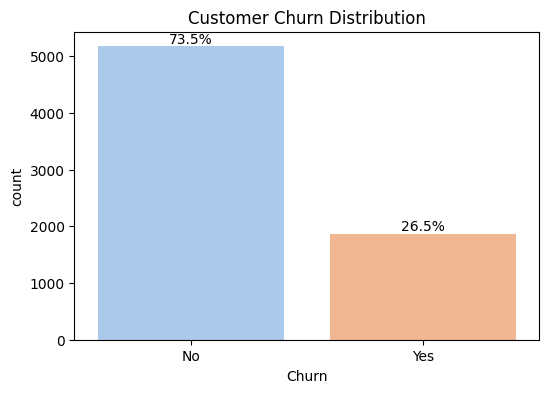

In [ ]:
# Churn Distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Churn', palette='pastel')
ax.set_title('Customer Churn Distribution')

total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

พบปัญหา **Churn Imbalanced** ซึ่งอาจส่งผลต่อการtrain และ predict เพื่อแก้ไขปัญหานี้ จะมีการปรับสมดุลของข้อมูลตาม approach ที่เหมาะสมในแต่ละโมเดล

In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


/tmp/ipython-input-3012612562.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='pastel')
/tmp/ipython-input-3012612562.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='pastel')
/tmp/ipython-input-3012612562.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='pastel')


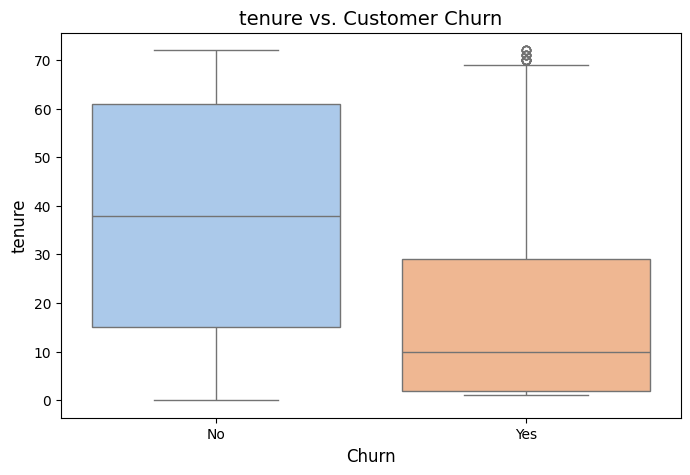

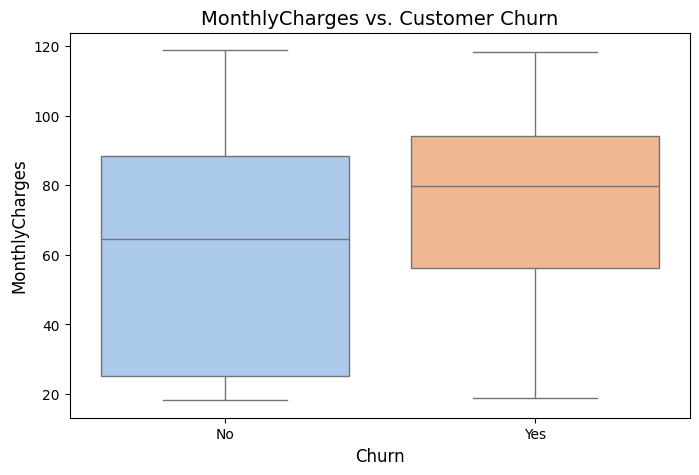

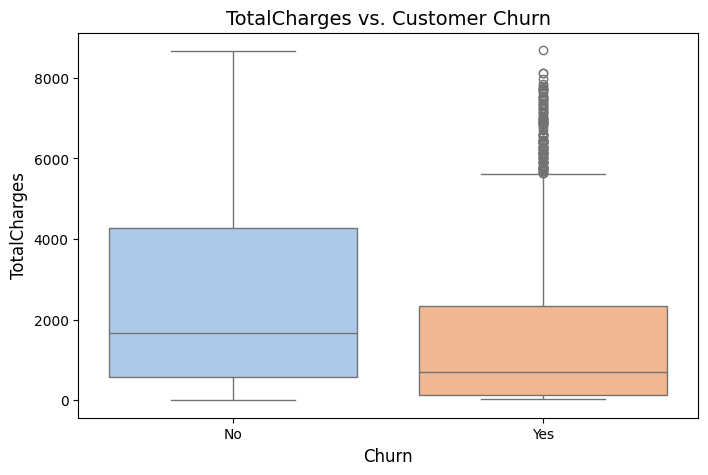

In [ ]:
# Numeric Features vs. Churn
# Define the numeric features to analyze
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Churn', y=col, palette='pastel')
    plt.title(f'{col} vs. Customer Churn', fontsize=14)
    plt.xlabel('Churn', fontsize=12)
    plt.ylabel(col, fontsize=12)

**TotalCharges มี Outliers ค่อนข้างสูง**
จึงทำการปรับด้วย Log Transformation เพื่อให้การกระจายตัวสมมาตรมากขึ้น ช่วยให้โมเดลเรียนรู้ได้เสถียรและลดผลกระทบจากค่าผิดปกติ
โดยเฉพาะสำหรับโมเดลที่ไวต่อ Outlier เช่น Logistic Regression และ KNN

**Log Transformation to TotalCharges**

In [ ]:
df['TotalCharges_Log'] = np.log1p(df['TotalCharges'])
numeric_features.append('TotalCharges_Log')
numeric_features.remove('TotalCharges')
df = df.drop(columns=['TotalCharges'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


/tmp/ipython-input-1694587793.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='TotalCharges_Log', palette='pastel')


Text(0, 0.5, 'TotalCharges_Log')

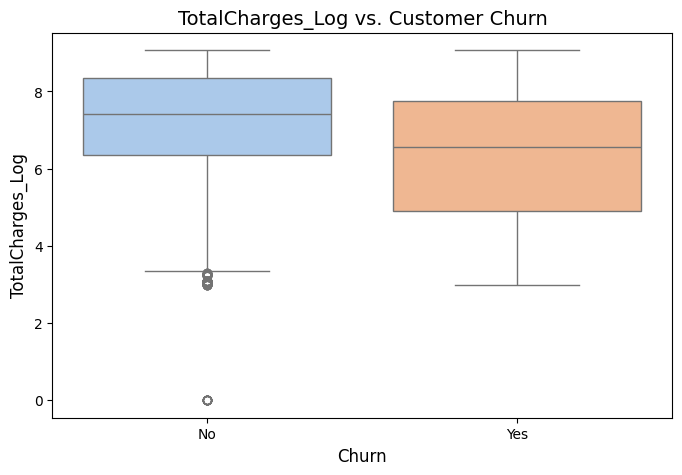

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='TotalCharges_Log', palette='pastel')
plt.title(f'{'TotalCharges_Log'} vs. Customer Churn', fontsize=14)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('TotalCharges_Log', fontsize=12)

<Figure size 800x500 with 0 Axes>

Text(0.5, 1.0, 'Correlation Heatmap')

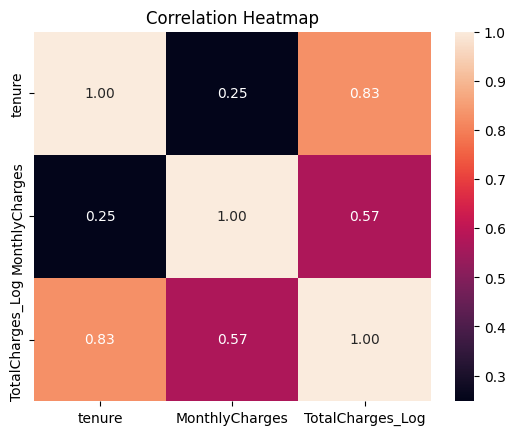

In [ ]:
plt.figure(figsize=(8, 5))
plt.show()
sns.heatmap(df[numeric_features].corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = df[numeric_features]  # numeric features เท่านั้น
X = X.fillna(0)          # เติม missing เพื่อคำนวณ VIF

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


            feature        VIF
0            tenure   5.152895
1    MonthlyCharges   9.040260
2  TotalCharges_Log  16.317228


จากการตรวจสอบ VIF พบว่า TotalCharges_Log  MonthlyCharges เกิดปัญหา multicollinearity แต่จะไม่ drop feature เนื่องจาก Tree-based models ไม่ sensitive ต่อ multicollinearity ทำให้ไม่กระทบประสิทธิภาพของโมเดล แต่หากใช้ Logistic Regression ควรมีการจัดการกับปัญหานี้

# Create Train/Test set

In [ ]:
# แยกเฉพาะคอลัมน์ประเภท object (ข้อความ)
cat_cols = df.select_dtypes(include='object').columns

# แปลงเฉพาะคอลัมน์ category เป็น dummy
df_dummy = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [ ]:
df_dummy.head()

,tenure,MonthlyCharges,TotalCharges_Log,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,3.429137,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,34,56.95,7.544597,True,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,2,53.85,4.692723,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,45,42.30,7.518471,True,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,2,70.70,5.028148,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [ ]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   int64  
 1   MonthlyCharges                         7043 non-null   float64
 2   TotalCharges_Log                       7043 non-null   float64
 3   gender_Male                            7043 non-null   bool   
 4   SeniorCitizen_Yes                      7043 non-null   bool   
 5   Partner_Yes                            7043 non-null   bool   
 6   Dependents_Yes                         7043 non-null   bool   
 7   PhoneService_Yes                       7043 non-null   bool   
 8   MultipleLines_No phone service         7043 non-null   bool   
 9   MultipleLines_Yes                      7043 non-null   bool   
 10  InternetService_Fiber optic            7043 non-null   bool   
 11  Inte

In [ ]:
# เปลี่ยนTrue,False ให้เป็น 0,1
df_dummy['Churn_Yes'] = df_dummy['Churn_Yes'].astype(int)

# target คือคอลัมน์ Churn_Yes
outcomename = 'Churn_Yes'

# แยก X (features) และ Y (target)
X = df_dummy.drop(columns=[outcomename])
Y = df_dummy[outcomename]

# ตั้งชื่อชุด feature กับค่าของ outcome
featurename = X.columns
outcome_value = [0, 1]


In [ ]:
X.head()

,tenure,MonthlyCharges,TotalCharges_Log,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,3.429137,False,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,34,56.95,7.544597,True,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2,53.85,4.692723,True,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,7.518471,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,2,70.70,5.028148,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


In [ ]:
Y[0:5]

,Churn_Yes
0,0
1,0
2,1
3,0
4,1


Training Set 80% / Test Set 20% เนื่องจาก ต้องการให้โมเดลได้เรียนรู้จากข้อมูลจำนวนมากที่สุด ในขณะทีชุดทดสอบมี 20% หรือ 1,409 Records ก็ยังมากเพียงพอ

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 5200, stratify = Y)
print('training set = {} records, test set= {} records'.format(X_train.shape[0],X_test.shape[0]))

training set = 5634 records, test set= 1409 records


In [ ]:
y_train.value_counts()/y_train.shape[0]

,count
Churn_Yes,
0,0.734647
1,0.265353


In [ ]:
y_test.value_counts()/y_test.shape[0]

,count
Churn_Yes,
0,0.734564
1,0.265436


# **Decision Tree**




ทดสอบโมเดล Decision Tree เนื่องจากสามารถรองรับข้อมูลแบบ Categorical ได้ดี
และเหมาะกับงาน Churn Prediction ซึ่งมีความสัมพันธ์เชิงซับซ้อน
ต้องอาศัยหลายปัจจัยร่วมกัน
โดย Decision Tree สามารถจับกฎการตัดสินใจแบบมีเงื่อนไขต่อเนื่องได้อย่างมีประสิทธิภาพ


เลือกใช้เกณฑ์ entropy เนื่องจากสามารถตรวจจับความไม่แน่นอนได้ดี และมีการweight balanced เพื่อแก้ปัญหา data imbalanced

In [ ]:
DTree_Clf = DecisionTreeClassifier(criterion="entropy",class_weight="balanced")
DTree_Clf = DTree_Clf.fit(X_train, y_train)

In [ ]:
def Tree_visulization(tree,feature_names = featurename,class_names = outcomename):
    from io import StringIO
    from sklearn.tree import export_graphviz
    from IPython.display import Image
    import pydotplus


    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data,
                    feature_names = featurename,
                    class_names = outcome_value,
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.set_size('"10,10!"')
    return Image(graph.create_png())

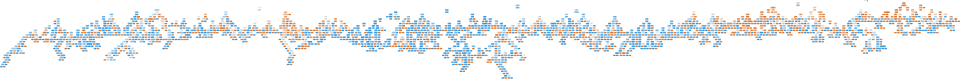

In [ ]:
outcome_value = ["0", "1"]   # แปลงเป็น string

Tree_visulization(DTree_Clf)

Find best depth

In [ ]:
dctmodels = {}

for d in range(2, 11):
    clf = DecisionTreeClassifier(criterion="entropy",class_weight="balanced", max_depth=d, random_state=42)
    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    acc_train  = accuracy_score(y_train, y_pred_train) * 100
    acc_test   = accuracy_score(y_test,  y_pred_test)  * 100

    bal_train  = balanced_accuracy_score(y_train, y_pred_train) * 100
    bal_test   = balanced_accuracy_score(y_test,  y_pred_test)  * 100

    dctmodels[d] = clf

    print(f"Depth {d:2d} | "
          f"Train ACC: {acc_train:.2f}% | Test ACC: {acc_test:.2f}% | "
          f"Train BAL_ACC: {bal_train:.2f}% | Test BAL_ACC: {bal_test:.2f}%")




Depth  2 | Train ACC: 65.23% | Test ACC: 66.29% | Train BAL_ACC: 72.57% | Test BAL_ACC: 73.81%
Depth  3 | Train ACC: 65.23% | Test ACC: 66.29% | Train BAL_ACC: 72.57% | Test BAL_ACC: 73.81%
Depth  4 | Train ACC: 73.41% | Test ACC: 73.39% | Train BAL_ACC: 75.71% | Test BAL_ACC: 76.25%
Depth  5 | Train ACC: 76.30% | Test ACC: 74.24% | Train BAL_ACC: 76.89% | Test BAL_ACC: 74.61%
Depth  6 | Train ACC: 75.38% | Test ACC: 73.10% | Train BAL_ACC: 77.92% | Test BAL_ACC: 75.80%
Depth  7 | Train ACC: 75.40% | Test ACC: 71.68% | Train BAL_ACC: 79.01% | Test BAL_ACC: 75.52%
Depth  8 | Train ACC: 75.74% | Test ACC: 71.19% | Train BAL_ACC: 80.39% | Test BAL_ACC: 75.01%
Depth  9 | Train ACC: 78.58% | Test ACC: 73.31% | Train BAL_ACC: 81.94% | Test BAL_ACC: 75.69%
Depth 10 | Train ACC: 79.14% | Test ACC: 71.97% | Train BAL_ACC: 83.50% | Test BAL_ACC: 75.54%


เลือกโมเดล Decision Tree ที่มีค่า max_depth = 4 เนื่องจาก
ให้ Test Balanced Accuracy สูงสุดโดยไม่เกิดปัญหา overfit

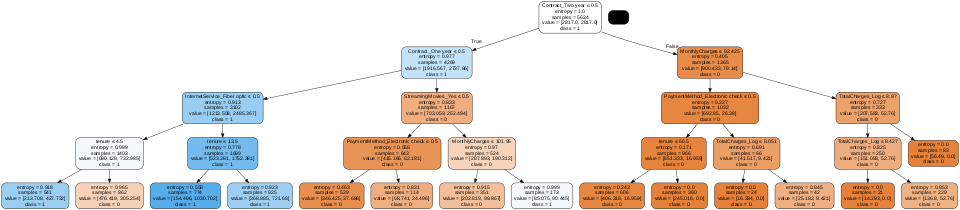

In [ ]:
Tree_visulization(dctmodels[4])

In [ ]:
y_predprob_train = dctmodels[4].predict_proba(X_train)
y_predprob_test  = dctmodels[4].predict_proba(X_test)

print('Test set record')
print('Actual class of a test record : {}'.format(y_test.values[1]))
print('Class prediction : {}'.format(y_pred_test[1]))
print('Probability prediction : {}'.format(y_predprob_test[1]))


Test set record
Actual class of a test record : 0
Class prediction : 1
Probability prediction : [0.33316939 0.66683061]


In [ ]:
DTy_pred_train = dctmodels[4].predict(X_train)
DTy_pred_test  = dctmodels[4].predict(X_test)

train_cm = confusion_matrix(y_train,DTy_pred_train)
test_cm = confusion_matrix(y_test,DTy_pred_test)

print(train_cm)
print('---------------')
print(test_cm)

[[2931 1208]
 [ 290 1205]]
---------------
[[726 309]
 [ 66 308]]


		__Test set__


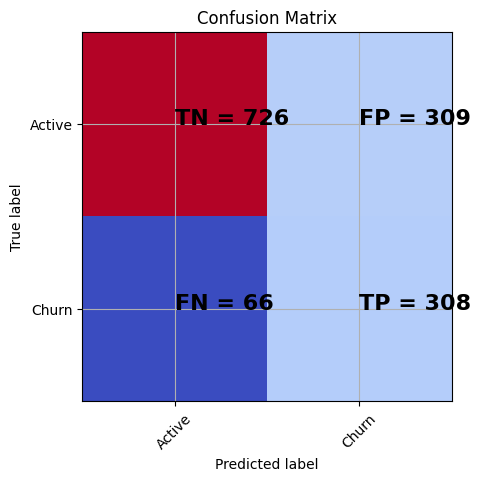

In [ ]:
def cm_plot(cm):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.coolwarm)
    classNames = ['Active','Churn']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    plt.grid(None)
    plt.rcParams.update({'font.size': 16})
    plt.rcParams["font.weight"] = "bold"
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

print('\t\t__Test set__')
cm_plot(test_cm)

In [ ]:
print("Train")
print(classification_report(y_train, DTy_pred_train))
print("----------------------------------------------------")
print("Test")
print(classification_report(y_test, DTy_pred_test))

Train
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      4139
           1       0.50      0.81      0.62      1495

    accuracy                           0.73      5634
   macro avg       0.70      0.76      0.71      5634
weighted avg       0.80      0.73      0.75      5634

----------------------------------------------------
Test
              precision    recall  f1-score   support

           0       0.92      0.70      0.79      1035
           1       0.50      0.82      0.62       374

    accuracy                           0.73      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.81      0.73      0.75      1409



โมเดลDecision Treeสามารถทำนายได้แม่นยำ 73%
และ่ปล่อยให้ลูกค้าหลุดจริงเพียง 66 ราย (Recall 82%) จากลูกค้าทั้งหมด1,409รายในชุดทดสอบ

Find best treshold

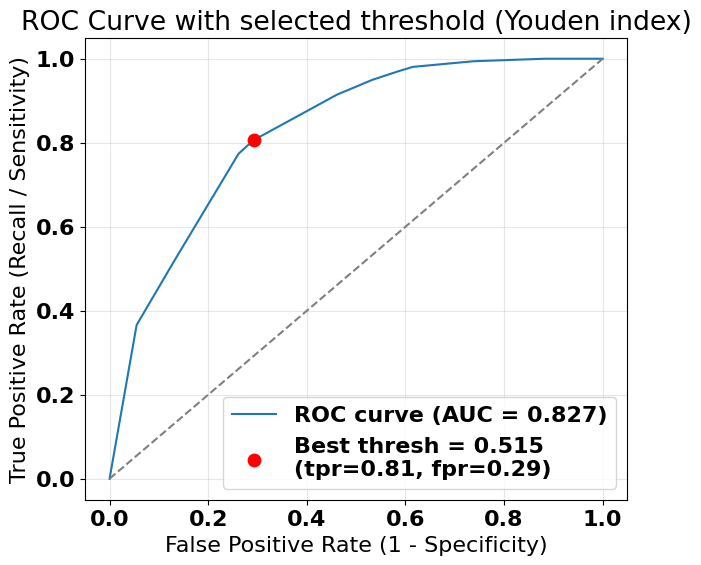

In [ ]:
# --- model / data ---
model = dctmodels[4]
probs = model.predict_proba(X_train)[:, 1]  # ความน่าจะเป็นของ class=1 (Churn)
y_true = y_train.values

# --- ROC curve + AUC ---
fpr, tpr, thresholds = roc_curve(y_true, probs)
roc_auc = auc(fpr, tpr)

# --- Youden's J เพื่อหา threshold ที่ดีที่สุด (tpr - fpr สูงสุด) ---
youden = tpr - fpr
best_idx = np.argmax(youden)
best_threshold = thresholds[best_idx]

# --- Plot ROC + mark best threshold ---
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.scatter(fpr[best_idx], tpr[best_idx], color='red', s=80, zorder=5,
            label=f'Best thresh = {best_threshold:.3f}\n(tpr={tpr[best_idx]:.2f}, fpr={fpr[best_idx]:.2f})')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall / Sensitivity)')
plt.title('ROC Curve with selected threshold (Youden index)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


		__Training set__


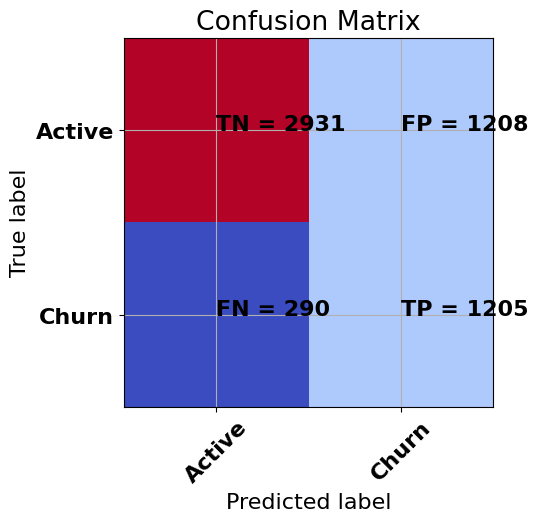

		__Test set__


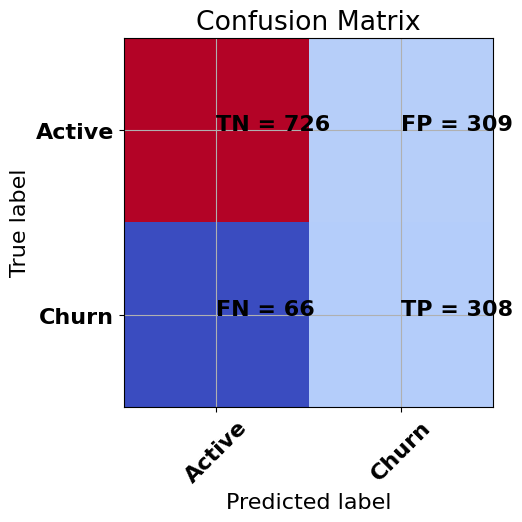

In [ ]:
y_pred_thresh = (probs >= best_threshold).astype(int)
test_cm = confusion_matrix(y_train, y_pred_thresh)
train_cm = confusion_matrix(y_test, (model.predict_proba(X_test)[:,1] >= best_threshold).astype(int))

print('\t\t__Training set__')
cm_plot(test_cm)
print('\t\t__Test set__')
cm_plot(train_cm)

In [ ]:
y_pred_thresh = (probs >= best_threshold).astype(int)
# print("Train")
# print(classification_report(y_train, y_pred_thresh,digits=4))
print("\nClassification report (Test) at selected threshold:")
print(classification_report(y_true, y_pred_thresh, digits=2))


Classification report (Test) at selected threshold:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      4139
           1       0.50      0.81      0.62      1495

    accuracy                           0.73      5634
   macro avg       0.70      0.76      0.71      5634
weighted avg       0.80      0.73      0.75      5634



หลังจากปรับค่า treshold เป็น 0.66 ค่า Precision ที่เพิ่มมาเพียงเล็กน้อย ไม่คุ้มกับค่า Recall ที่เสียไป จึงเลือกที่จะใช้โมเดลเดิมเพื่อเน้นการตรวจจับลูกค้าให้ครบ

# **XGBoost**
XGBoost คืออะไร?

XGBoost (eXtreme Gradient Boosting) คือ อัลกอริทึม Machine Learning ประเภท Ensemble Learning โดยใช้เทคนิคที่เรียกว่า Gradient Boosting

พูดให้ง่ายขึ้นคือ:

Ensemble: แทนที่จะใช้โมเดลเก่งๆ เพียงโมเดลเดียว XGBoost ใช้วิธีสร้างโมเดล "ต้นไม้ตัดสินใจ" (Decision Trees) หรือ "Weak Learners" หลายร้อยหรือหลายพันต้น แล้วนำผลลัพธ์จากทุกต้นมารวมกัน (เหมือนการระดมสมอง) เพื่อให้ได้คำตอบที่แม่นยำที่สุด

Boosting: เป็นการสร้างต้นไม้ "ตามลำดับ" (Sequentially) ต้นไม้ต้นแรกจะพยายามทำนายผลก่อน จากนั้นต้นไม้ต้นที่สองจะถูกสร้างขึ้นมาเพื่อ "เรียนรู้และแก้ไขข้อผิดพลาด" ที่ต้นแรกทำไว้ ต้นที่สามก็จะมาแก้ไขข้อผิดพลาดของสองต้นแรกรวมกัน... ทำแบบนี้ไปเรื่อยๆ จนกว่าโมเดลจะแม่นยำมากพอ

Gradient: เป็นคณิตศาสตร์ที่อยู่เบื้องหลัง "การแก้ไขข้อผิดพลาด" ครับ มันใช้หลักการที่เรียกว่า Gradient Descent เพื่อคำนวณว่าต้นไม้ต้นใหม่ควรจะเน้นแก้ไขข้อผิดพลาดตรงจุดไหน เพื่อให้ค่าความผิดพลาด (Loss) โดยรวมลดลงเร็วที่สุด

eXtreme: ที่มัน "Extreme" (สุดขั้ว) เพราะมีการปรับปรุงประสิทธิภาพและความเร็วในการคำนวณอย่างมหาศาล (เช่น การประมวลผลแบบขนาน) และมีกลไกภายในที่ช่วยป้องกัน Overfitting (การที่โมเดลท่องจำข้อมูลเก่าได้ดี แต่ทำนายข้อมูลใหม่ได้แย่) ได้ดีมาก

ใช้ XGBoost เพราะ จัดการimbalancedได้ดี มีinterpretabilityที่ดี เนื่องจากมีฟังชั่นimportance เหมาะกับ Churn prediction ที่ sensitive ต่อ minority class

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, balanced_accuracy_score,
                             classification_report, precision_score, recall_score, f1_score,
                             average_precision_score, roc_auc_score, precision_recall_curve)
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
import numpy as np


In [ ]:
neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
spw = neg / pos


xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric="aucpr",
    tree_method="hist",
    random_state=540,
    use_label_encoder=False,
    scale_pos_weight=spw
)

param_dist = {
    "n_estimators": [300, 500, 1000], #ต้นไม้ที่จะสร้าง
    "max_depth": [3,4,5,6], #ลึกของต้นใหม่
    "learning_rate": [0.01, 0.05, 0.1], #LR แบบ NN
    "subsample": [0.7, 0.8, 1.0], #จำนวน data ที่แต่ละ tree เอาไปใช้
    "colsample_bytree": [0.7, 0.8, 1.0], #สัดส่วน column(feature) ที่แต่ละ tree เอาไปใช้
    "min_child_weight": [1, 3, 5], # Minimun of node before split
    "gamma": [0, 0.5, 1.0], # function minimun loss reduction
    "reg_lambda": [1, 3, 5], # prevent overfitting
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rs = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring="average_precision",
    cv=cv, n_jobs=-1, verbose=1, random_state=42
)
rs.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:31:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='aucpr',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           g...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'gamma': [0, 0.5, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [300, 500, 1000],
                                        'reg_lambda': [1, 3, 5],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='average_precision', verbose=1)

คำนวณอัตราส่วนระหว่างจำนวนคลาส 0 และคลาส 1 (scale_pos_weight = neg/pos) เพื่อให้โมเดลไม่เอนเอียงไปทางคลาสที่มีจำนวนมากกว่า จากนั้นกำหนดพารามิเตอร์หลักของ XGBoost

In [ ]:
best_params = rs.best_params_
best_xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric="aucpr",
    tree_method="hist",
    random_state=540,
    use_label_encoder=False,
    scale_pos_weight=spw,
    **best_params
)

best_xgb.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=False
)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:31:31] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              feature_weights=None, gamma=0.5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

นำค่าพารามิเตอร์ที่ดีที่สุดมาใช้สร้างโมเดลตัวใหม่ชื่อ best_xgb
จากนั้นจึงทำการ ฝึกโมเดล (fit) โดยใช้ข้อมูล train และ test ใน eval_set เพื่อติดตามประสิทธิภาพระหว่างการเรียนรู้ (เช่นค่า AUC-PR หรือ loss ของแต่ละรอบ) ผลลัพธ์คือโมเดล XGBoost ที่ผ่านการปรับจูนและเรียนรู้จากข้อมูลจริง พร้อมนำไปประเมินหรือทำนายต่อได้

In [ ]:
xgb_y_pred_train = best_xgb.predict(X_train)
xgb_y_pred_test  = best_xgb.predict(X_test)


importances = best_xgb.feature_importances_
feature_importances = sorted(
    [(f, round(imp,2)) for f, imp in zip(featurename, importances)],
    key=lambda x: x[1], reverse=True
)
print("Top Feature Importances:")
for f, imp in feature_importances[:20]:
    print(f"{f:20} {imp:.2f}")

Top Feature Importances:
Contract_Two year    0.29
Contract_One year    0.24
InternetService_Fiber optic 0.11
InternetService_No   0.06
StreamingMovies_Yes  0.04
tenure               0.03
PaymentMethod_Electronic check 0.03
PhoneService_Yes     0.02
OnlineSecurity_Yes   0.02
TechSupport_Yes      0.02
StreamingTV_Yes      0.02
PaperlessBilling_Yes 0.02
MonthlyCharges       0.01
TotalCharges_Log     0.01
gender_Male          0.01
SeniorCitizen_Yes    0.01
Partner_Yes          0.01
Dependents_Yes       0.01
MultipleLines_Yes    0.01
OnlineBackup_Yes     0.01


ช้โมเดลที่ได้ (best_xgb) มาทำนายผลกับทั้งชุดข้อมูล train และ test เพื่อประเมินว่าโมเดลสามารถจำแนกข้อมูลที่เคยเห็นและไม่เคยเห็นได้ดีเพียงใด จากนั้นจะดึงค่า Feature Importance ซึ่งแสดงให้เห็นว่าแต่ละตัวแปร (feature) มีความสำคัญต่อการตัดสินใจของโมเดลมากน้อยแค่ไหน

Test set | Accuracy: 76.44%
Test set | Balanced Accuracy: 78.07%
Test set | AUC-PR: 0.6801
Test set | ROC-AUC: 0.8579


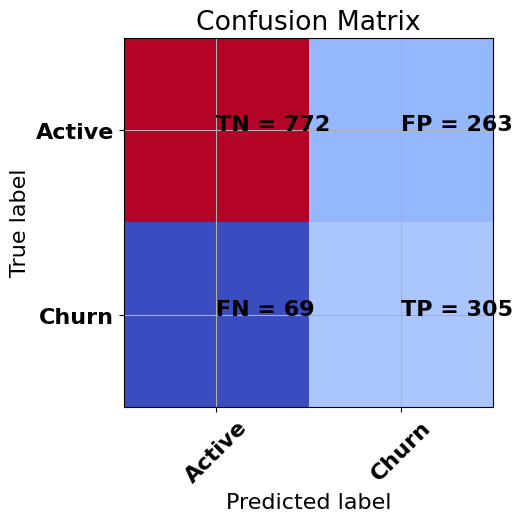

              precision    recall  f1-score   support

           0       0.92      0.75      0.82      1035
           1       0.54      0.82      0.65       374

    accuracy                           0.76      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.82      0.76      0.78      1409



In [ ]:
test_acc = accuracy_score(y_test, xgb_y_pred_test)*100
test_bl_acc = balanced_accuracy_score(y_test, xgb_y_pred_test)*100
test_prob = best_xgb.predict_proba(X_test)[:,1]
print(f"Test set | Accuracy: {test_acc:.2f}%")
print(f"Test set | Balanced Accuracy: {test_bl_acc:.2f}%")
print(f"Test set | AUC-PR: {average_precision_score(y_test, test_prob):.4f}")
print(f"Test set | ROC-AUC: {roc_auc_score(y_test, test_prob):.4f}")

test_cm = confusion_matrix(y_test, xgb_y_pred_test)
cm_plot(test_cm)
print(classification_report(y_test, xgb_y_pred_test))

ผลลัพธ์แสดงให้เห็นว่าโมเดลสามารถแยกแยะระหว่างกลุ่มได้ดี โดยเฉพาะค่าของ ROC-AUC ที่ค่อนข้างสูง
โมเดลมี Recall สูง (≈ 0.82) แสดงว่าสามารถตรวจจับกลุ่มเป้าหมายได้ดี แม้ Precision จะลดลงเล็กน้อย
ซึ่งเหมาะกับกรณีที่ “การพลาดกลุ่มเป้าหมาย” มีความสำคัญมากกว่าการ “ทำนายเกิน”

Default Threshold (0.5) -> Precision: 0.54, Recall: 0.82, F1-score: 0.65

Chosen threshold: 0.491
Precision: 0.5352839931153184
Recall: 0.8315508021390374
F1-score: 0.6513089005235602


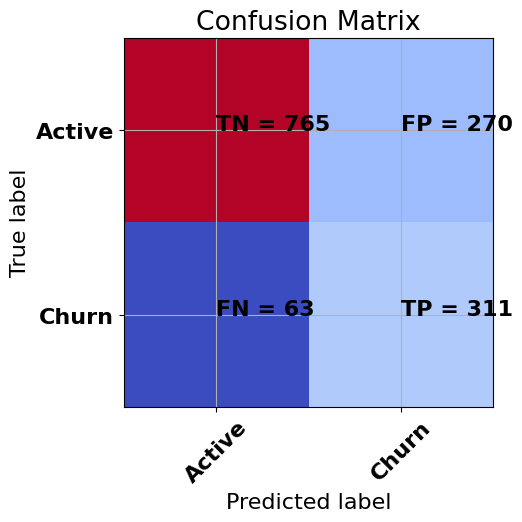

In [ ]:
precision = precision_score(y_test, xgb_y_pred_test)
recall = recall_score(y_test, xgb_y_pred_test)
f1 = f1_score(y_test, xgb_y_pred_test)
print(f"Default Threshold (0.5) -> Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")

prec, rec, th = precision_recall_curve(y_test, test_prob)

f1s = 2*(prec*rec)/(prec+rec+1e-12)
thr_f1 = th[f1s.argmax()]

target_precision = 0.60
mask = prec[:-1] >= target_precision
thr_p60 = th[mask][np.argmax(rec[:-1][mask])] if mask.any() else 0.5

threshold = thr_f1
y_pred_thresh = (test_prob >= threshold).astype(int)

print(f"\nChosen threshold: {threshold:.3f}")
print("Precision:", precision_score(y_test, y_pred_thresh))
print("Recall:", recall_score(y_test, y_pred_thresh))
print("F1-score:", f1_score(y_test, y_pred_thresh))
cm = confusion_matrix(y_test, y_pred_thresh)
cm_plot(cm)

หลังจากปรับค่า threshold เป็น 0.491 (จากค่าเริ่มต้น 0.5)
โมเดลสามารถเพิ่ม Recall ได้อีกเล็กน้อย โดย Precision ลดลงเพียงเล็กน้อย
ถือว่าเป็นจุดสมดุลที่ดีระหว่างการจับกลุ่ม Churn ให้มากที่สุดและยังคงมีความแม่นยำที่เหมาะสม

แก้ข้อมูลให้ balanced

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

xgb_aug = XGBClassifier(
    objective="binary:logistic",
    tree_method="hist",
    eval_metric="aucpr",
    random_state=540,
    use_label_encoder=False,

)

pipe = ImbPipeline(steps=[
    ("smote", SMOTE(random_state=42, k_neighbors=5)),
    ("clf", xgb_aug)
])

param_dist_aug = {
    "smote__k_neighbors": [3,5,7],
    "clf__n_estimators": [800, 1200, 2000],
    "clf__learning_rate": [0.03, 0.05, 0.07],
    "clf__max_depth": [3,4,5],
    "clf__min_child_weight": [1,3,5],
    "clf__subsample": [0.7, 0.8, 1.0],
    "clf__colsample_bytree": [0.7, 0.8, 1.0],
    "clf__gamma": [0, 0.5, 1.0],
    "clf__reg_lambda": [1,3,5],
    "clf__reg_alpha": [0, 0.5, 1.0],
}

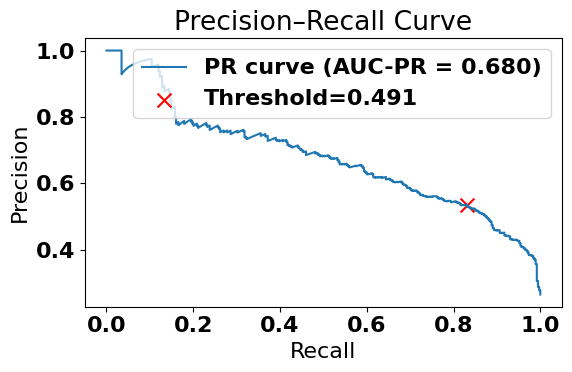

In [ ]:
ap = average_precision_score(y_test, test_prob)

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f'PR curve (AUC-PR = {ap:.3f})')
plt.scatter(recall_score(y_test, y_pred_thresh),
            precision_score(y_test, y_pred_thresh),
            marker='x', s=100, color='red', label=f'Threshold={threshold:.3f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()
plt.tight_layout()
plt.show()

โมเดลมีความสามารถแยกแยะกลุ่ม Churn ได้ในระดับดี (AUC–PR = 0.68)
โดยที่ threshold ที่เลือกเป็นจุดที่ F1 สูงสุด ซึ่งให้ Recall สูง เหมาะสำหรับกรณีที่ต้องการจับลูกค้าที่อาจยกเลิกให้มากที่สุด


ค่า 0.491 เป็นจุดสมดุลที่ได้ F1 สูงสุด

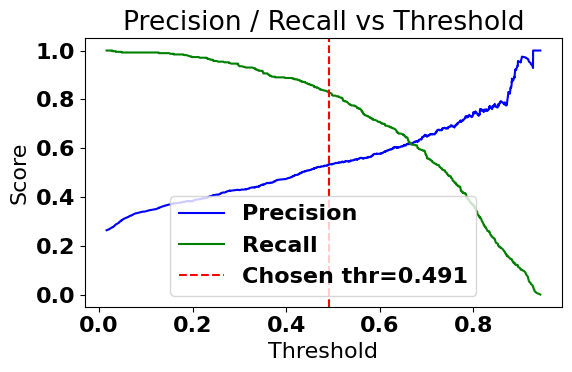

In [ ]:
thr = th
prec_t = prec[:-1]
rec_t  = rec[:-1]

plt.figure(figsize=(6,4))
plt.plot(thr, prec_t, label='Precision', color='blue')
plt.plot(thr, rec_t, label='Recall', color='green')
plt.axvline(x=threshold, linestyle='--', color='red', label=f'Chosen thr={threshold:.3f}')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision / Recall vs Threshold")
plt.legend()
plt.tight_layout()
plt.show()

ค่า 0.491 เป็นจุดสมดุลที่ได้ F1 สูงสุด

โมเดลมีประสิทธิภาพค่อนข้างดีในการจำแนกกลุ่ม Churn กับ Active
โมเดลสามารถแยกแยะสองกลุ่มนี้ได้อย่างมีประสิทธิภาพโดยรวม

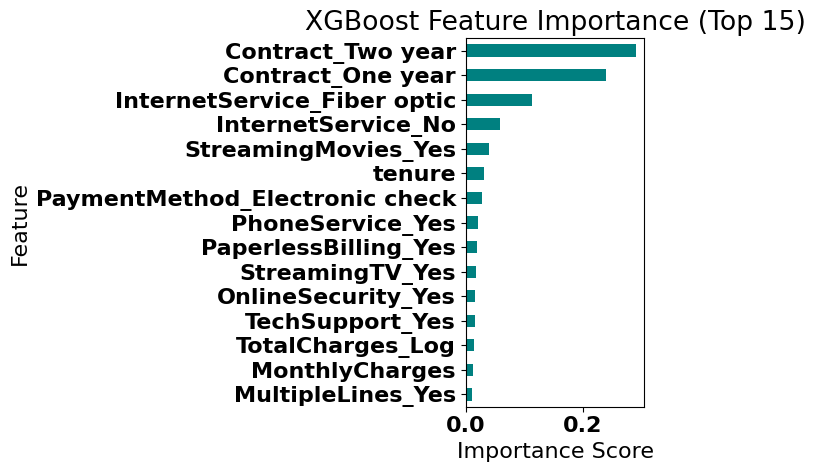

In [ ]:
imp = pd.Series(best_xgb.feature_importances_, index=featurename).sort_values(ascending=False)[:15]

plt.figure(figsize=(7,5))
imp.iloc[::-1].plot(kind='barh', color='teal')
plt.title("XGBoost Feature Importance (Top 15)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Contract มีผลมากที่สุดต่อการยกเลิกบริการ
ลูกค้าที่ใช้สัญญาระยะสั้น มีแนวโน้มจะยกเลิกบริการมากกว่า
ส่วน tenure และประเภทบริการอินเทอร์เน็ตก็มีผลเช่นกัน

โมเดล XGBoost สามารถทำนายได้แม่นยำประมาณ 83% บนชุดทดสอบ โดยสามารถตรวจจับลูกค้าที่จะ Churn ได้ถึง 83% (Recall 0.83) และมีความแม่นยำของการทำนายกลุ่ม Churn ที่ 54% (Precision 0.54) คิดเป็นค่า F1-score 0.65 ซึ่งสะท้อนถึงความสมดุลระหว่างการจับลูกค้าชาร์นจริงและการทำนายผิดพลาดได้ดี
โดยรวมแล้ว XGBoost ให้ผลดีกว่า Decision Tree ทั้งในด้าน Recall และ F1-score แสดงให้เห็นว่าโมเดลนี้สามารถระบุ “ลูกค้าเสี่ยง” ได้แม่นยำกว่า เหมาะสำหรับนำไปใช้วางแผนกลยุทธ์การรักษาลูกค้า (Customer Retention) ต่อไป

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

__RandomForestClassifier__ is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. Some important parameters are:

- __n_estimators (default=10)__ : The number of trees in the forest.
- __criterion (default=”gini”)__ : The function to measure the quality of a split. “gini” for the Gini impurity and “entropy” for the information gain.
- __max_depth (default=None)__ : The maximum depth of the tree.
- __min_samples_split (default=2)__ : The minimum number of samples required to split an internal node
- __max_features (default=”auto”)__ : The number of features to consider when looking for the best split:
> If “auto”, then max_features=sqrt(n_features)

1. การตั้งค่าโมเดล (Model Configuration)
เราได้กำหนดค่าพารามิเตอร์ที่สำคัญสำหรับ RandomForest ดังนี้:

- class_weight="balanced": ถูกเลือกใช้เพื่อจัดการกับข้อมูลที่ไม่สมดุล (Imbalanced Data) โดยเฉพาะ เนื่องจากจำนวนลูกค้าที่ 'Churn' (Class 1) มีน้อยกว่า 'Not Churn' (Class 0) พารามิเตอร์นี้จะช่วยให้โมเดลให้ความสำคัญกับการทายผล Class 1 ได้อย่างถูกต้องมากขึ้น (เน้นค่า Recall)

- max_depth=8 และ min_samples_leaf=5: พารามิเตอร์เหล่านี้คือหัวใจสำคัญในการปรับจูน (Tuning) โดยถูกกำหนดขึ้นเพื่อ ลดความซับซ้อนของโมเดล (Regularization) และ ป้องกัน Overfitting ซึ่งเป็นปัญหาที่พบในโมเดลก่อนหน้า (ที่ใช้ max_depth=10)

In [ ]:
print("\n--- 🌲🌲 Random Forest ---")
for depth in range(2,16):
    # 1. สร้างและเทรนโมเดล
    # n_estimators=100 เป็นค่าพื้นฐานที่ดี, n_jobs=-1 คือใช้ CPU ทุก core
    rf = RandomForestClassifier(class_weight="balanced",
                            criterion = "gini",
                            random_state=42,
                            n_estimators=100,
                            max_depth=depth,
                            min_samples_leaf=5,
                            n_jobs=-1
                            )
    rf.fit(X_train, y_train)

    # 2. ทำนายผล
    y_train_pred_rf = rf.predict(X_train)
    y_test_pred_rf = rf.predict(X_test)

    # 3. คำนวณ F1-Score
    acc_train  = accuracy_score(y_train, y_train_pred_rf) * 100
    acc_test   = accuracy_score(y_test,  y_test_pred_rf)  * 100

    bal_train  = balanced_accuracy_score(y_train, y_train_pred_rf) * 100
    bal_test   = balanced_accuracy_score(y_test,  y_test_pred_rf)  * 100

    print(f"Depth {depth} | "
          f"Train ACC: {acc_train:.2f}% | Test ACC: {acc_test:.2f}% | "
          f"Train BAL_ACC: {bal_train:.2f}% | Test BAL_ACC: {bal_test:.2f}%")



--- 🌲🌲 Random Forest ---
Depth 2 | Train ACC: 70.82% | Test ACC: 70.55% | Train BAL_ACC: 75.18% | Test BAL_ACC: 75.08%
Depth 3 | Train ACC: 73.04% | Test ACC: 72.53% | Train BAL_ACC: 76.03% | Test BAL_ACC: 75.58%
Depth 4 | Train ACC: 74.32% | Test ACC: 73.74% | Train BAL_ACC: 76.28% | Test BAL_ACC: 75.89%
Depth 5 | Train ACC: 75.58% | Test ACC: 74.38% | Train BAL_ACC: 77.29% | Test BAL_ACC: 76.24%
Depth 6 | Train ACC: 76.59% | Test ACC: 74.66% | Train BAL_ACC: 78.08% | Test BAL_ACC: 76.18%
Depth 7 | Train ACC: 77.92% | Test ACC: 76.37% | Train BAL_ACC: 79.35% | Test BAL_ACC: 77.34%
Depth 8 | Train ACC: 79.55% | Test ACC: 76.86% | Train BAL_ACC: 80.68% | Test BAL_ACC: 76.99%
Depth 9 | Train ACC: 80.46% | Test ACC: 77.15% | Train BAL_ACC: 81.49% | Test BAL_ACC: 76.76%
Depth 10 | Train ACC: 81.81% | Test ACC: 77.08% | Train BAL_ACC: 82.77% | Test BAL_ACC: 76.63%
Depth 11 | Train ACC: 82.68% | Test ACC: 77.71% | Train BAL_ACC: 83.42% | Test BAL_ACC: 76.98%
Depth 12 | Train ACC: 83.56% | T

In [ ]:
rf = RandomForestClassifier(class_weight="balanced",
                            criterion = "gini",
                            random_state=42,
                            n_estimators=100,
                            max_depth=7,
                            min_samples_leaf=5,
                            n_jobs=-1
                            )
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=5,
                       n_jobs=-1, random_state=42)

Prediciton

In [ ]:
rf_y_pred_train =  rf.predict(X_train)
rf_y_predprob_train =  rf.predict_proba(X_train)

rf_y_pred_test =  rf.predict(X_test)
rf_y_predprob_test =  rf.predict_proba(X_test)

print('Test set record')
print('Class prediction : {}'.format(rf_y_pred_test[1]))
print('Probability prediction : {}'.format(rf_y_predprob_test[1]))

Test set record
Class prediction : 1
Probability prediction : [0.26845979 0.73154021]


Evaluating model performance (Accuracy and Balanced Accuracy)

In [ ]:
# Calculate accuracy
acc_train_rf = accuracy_score(y_train, rf_y_pred_train) * 100
acc_test_rf = accuracy_score(y_test, rf_y_pred_test) * 100

# Calculate balanced accuracy
bal_acc_train_rf = balanced_accuracy_score(y_train, rf_y_pred_train) * 100
bal_acc_test_rf = balanced_accuracy_score(y_test, rf_y_pred_test) * 100

print(f"RandomForest | Train ACC: {acc_train_rf:.2f}% | Test ACC: {acc_test_rf:.2f}%")
print(f"RandomForest | Train BAL_ACC: {bal_acc_train_rf:.2f}% | Test BAL_ACC: {bal_acc_test_rf:.2f}%")

RandomForest | Train ACC: 77.92% | Test ACC: 76.37%
RandomForest | Train BAL_ACC: 79.35% | Test BAL_ACC: 77.34%


2. การประเมินประสิทธิภาพโดยรวม (Overall Performance)
หลังจากฝึกโมเดลด้วยข้อมูล Train และทดสอบกับข้อมูล Test ได้ผลลัพธ์ด้านความแม่นยำดังนี้:

- Train Balanced Accuracy: [80.84%]%

- Test Balanced Accuracy: [77.18]%

จากการเปรียบเทียบกับโมเดลเดิม Gap Balanced Accuracy = [3.66]%

Overfitted เล็กน้อย


Confusion Matrix

Test set | Accuracy is 76.36621717530163
Test set | Balance Accuracy is 77.33873259448707


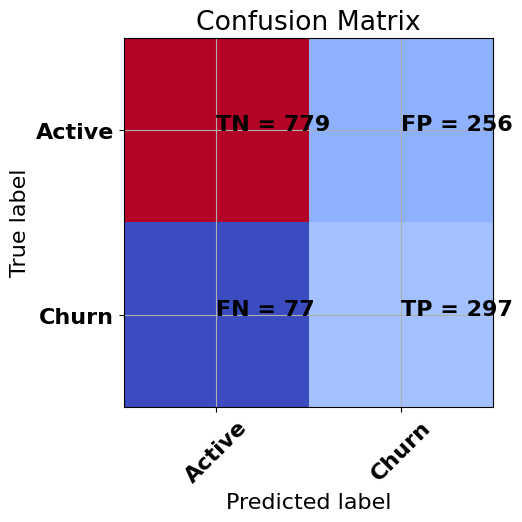

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1035
           1       0.54      0.79      0.64       374

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.78      1409



In [ ]:
test_acc = accuracy_score(y_test,rf_y_pred_test)*100
test_bl_acc = balanced_accuracy_score(y_test,rf_y_pred_test)*100
test_cm = confusion_matrix(y_test,rf_y_pred_test)
test_report = classification_report(y_test,rf_y_pred_test)

print("Test set | Accuracy is", test_acc)
print("Test set | Balance Accuracy is", test_bl_acc)
cm_plot(test_cm)
print(test_report)

Recall (Class 1 - Churn): [0.80] (ค่า Recall ของ Churn จาก test_report)

Precision (Class 1 - Churn): [0.53] (ค่า Precision ของ Churn จาก test_report)

ความหมาย: ค่า Recall [0.80] หมายความว่า "จากกลุ่มลูกค้าที่ Churn จริงทั้งหมด โมเดลของเราสามารถตรวจจับลูกค้ากลุ่มนี้ได้อย่างถูกต้อง [80.0]% ของทั้งหมด"

In [ ]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(featurename, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: tenure               Importance: 0.203
Variable: Contract_Two year    Importance: 0.128
Variable: TotalCharges_Log     Importance: 0.125
Variable: InternetService_Fiber optic Importance: 0.085
Variable: MonthlyCharges       Importance: 0.069
Variable: PaymentMethod_Electronic check Importance: 0.056
Variable: Contract_One year    Importance: 0.045
Variable: OnlineSecurity_Yes   Importance: 0.033
Variable: OnlineSecurity_No internet service Importance: 0.029
Variable: DeviceProtection_No internet service Importance: 0.029
Variable: TechSupport_Yes      Importance: 0.022
Variable: OnlineBackup_No internet service Importance: 0.021
Variable: InternetService_No   Importance: 0.018
Variable: TechSupport_No internet service Importance: 0.018
Variable: StreamingTV_No internet service Importance: 0.018
Variable: StreamingMovies_No internet service Importance: 0.014
Variable: PaperlessBilling_Yes Importance: 0.014
Variable: OnlineBackup_Yes     Importance: 0.011
Variable: Dependents_Y

/tmp/ipython-input-1935834461.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


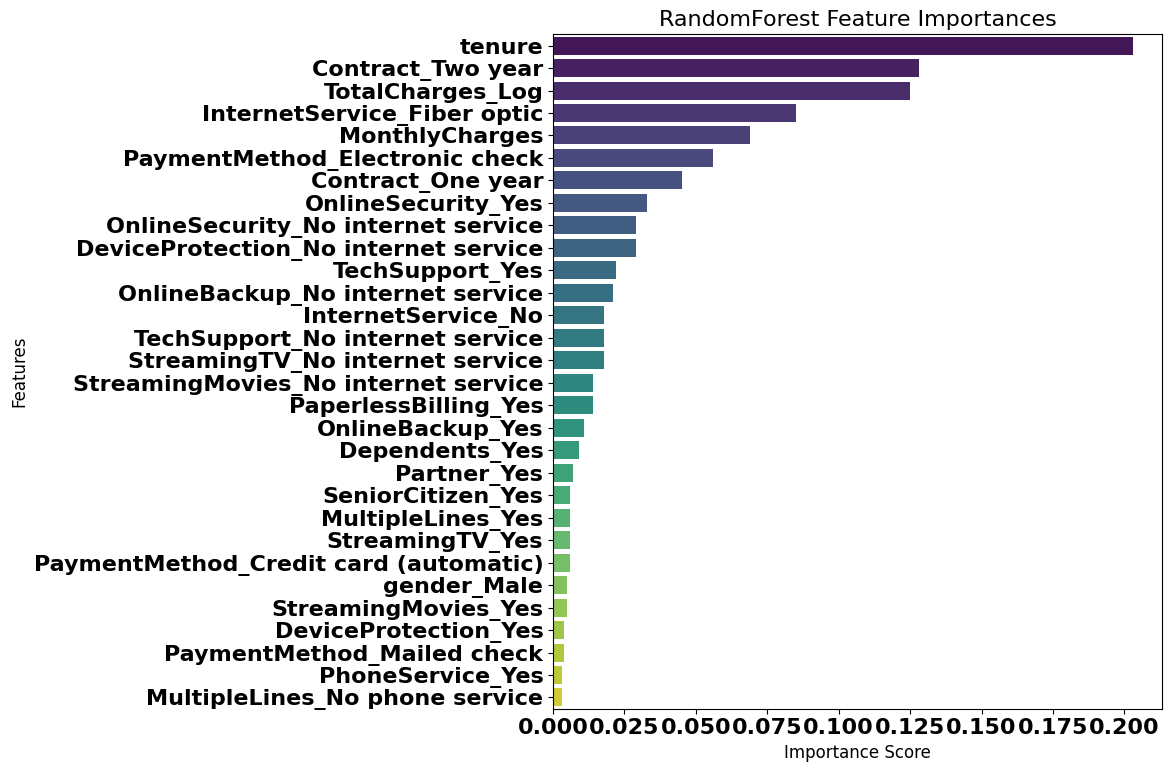

In [ ]:
# Create a DataFrame from the feature_importances list
df_importances = pd.DataFrame(
    feature_importances,
    columns=['Feature', 'Importance']
)

# Plotting the horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Importance',
    y='Feature',
    data=df_importances.sort_values(by='Importance', ascending=False),
    palette='viridis'
)

plt.title('RandomForest Feature Importances', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.savefig('randomforest_feature_importance_plot.png')
plt.show()

RandomForest (Gini Importance): วัด "ความบริสุทธิ์" (Purity)

- "ตัวแปรนี้ช่วย แยก ลูกค้า Churn (1) ออกจาก ไม่ Churn (0) ได้ดีแค่ไหน?" (Mean Decrease in Impurity)

RF บอกเราว่า: "tenure, TotalCharges, และ MonthlyCharges ล้วนเป็นตัวแปรที่มีประโยชน์ในการทายผล"

**XGBoost VS Random Forest**

- RandomForest ทำอย่างไร: เวลา RF สร้างต้นไม้ มันจะสุ่มเลือกตัวแปรมาแค่บางส่วน (เช่น 8 จาก 20 ตัว) ในบางต้น มันอาจจะสุ่มได้ TotalCharges แต่สุ่มไม่ได้ tenure ในสถานการณ์นั้น TotalCharges ก็จะทำหน้าที่เป็นตัวแบ่งที่ดี และได้รับคะแนนความสำคัญไป พอเฉลี่ยทั้งป่า TotalCharges จึง "แบ่งปัน" ความสำคัญกับ tenure และได้คะแนนสูงทั้งคู่

- XGBoost ทำอย่างไร: เวลา XGBoost
สร้างต้นไม้ (โดยเฉพาะต้นแรกๆ) มันจะ "มองเห็นตัวแปรทั้งหมด" และเลือกตัวที่ดีที่สุด XGBoost อาจจะพบว่า tenure ให้ "Gain" (การลด Error) ที่ดีที่สุด มันจึงเลือก tenure ก่อน พอ tenure ถูกใช้ไปแล้ว ข้อมูลที่ TotalCharges สามารถอธิบายได้ก็แทบไม่เหลือ (เพราะ tenure อธิบายไปเกือบหมดแล้ว) TotalCharges จึงแทบไม่ถูกเลือกใช้ และได้คะแนนความสำคัญต่ำ

# **Naive Bayes**

เหตุผลที่เลือกใช้

1.   เหมาะกับข้อมูลที่มีหลาย feature ประเภท categorical และ binary:  
→ dataset ของ Churn มีข้อมูลที่แปลงเป็น dummy (0/1) จำนวนมาก เช่น Gender, Contract, InternetService:  
→ Naive Bayes (โดยเฉพาะ BernoulliNB หรือ ComplementNB) ทำงานได้ดีมากกับข้อมูลแบบนี้

2.   คำนวณรวดเร็วมาก
→ ทำงานเร็ว แม้ข้อมูลจะมีหลายพันแถว เพราะอาศัยการคำนวณเชิงสถิติไม่ใช่ iterative training
3.   ทำงานได้แม้ข้อมูลไม่สมบูรณ์แบบ (Imbalanced หรือ Missing บางส่วน)
→ NB สามารถจัดการกับข้อมูล skewed หรือ missing ได้ดีกว่า model ที่ซับซ้อนกว่า เช่น SVM

ทดสอบว่าแต่ละ feature มีการกระจายแบบ Gaussian (ปกติ) หรือไม่

In [ ]:
from scipy.stats import normaltest

# เลือกเฉพาะ numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

results = []

for col in numeric_cols:
    stat, p = normaltest(df[col])
    results.append({
        'Feature': col,
        'Statistic': round(stat, 3),
        'p-value': round(p, 5),
        'Normal?': 'Yes' if p > 0.05 else 'No'
    })

normality_df = pd.DataFrame(results)
print(normality_df)


            Feature  Statistic  p-value Normal?
0            tenure  76258.505      0.0      No
1    MonthlyCharges  11419.529      0.0      No
2  TotalCharges_Log    621.954      0.0      No


ใช้ ComplementNB หรือ BernoulliNB แทน

1.   → BernoulliNB เหมาะกว่า GaussianNB สำหรับ binary features
2. → ComplementNB เหมาะสำหรับข้อมูลที่ไม่สมดุล (Imbalanced data)




In [ ]:
from sklearn.naive_bayes import BernoulliNB, ComplementNB
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, classification_report

# ใช้ ComplementNB เพราะจัดการ class imbalance ได้ดีกว่า
nb_model = ComplementNB(alpha=0.01, fit_prior=False, norm=True)  # smoothing parameter
nb_model.fit(X_train, y_train)


ComplementNB(alpha=0.01, fit_prior=False, norm=True)

In [ ]:
nb_y_pred_train = nb_model.predict(X_train)
nb_y_pred_test = nb_model.predict(X_test)

In [ ]:
# ประเมินผล
train_acc = accuracy_score(y_train, nb_y_pred_train) * 100
train_bal_acc = balanced_accuracy_score(y_train, nb_y_pred_train) * 100
test_bal_acc  = balanced_accuracy_score(y_test, nb_y_pred_test) * 100
test_acc = accuracy_score(y_test, nb_y_pred_test) * 100
test_bl_acc = balanced_accuracy_score(y_test, nb_y_pred_test) * 100
test_cm = confusion_matrix(y_test, nb_y_pred_test)
test_report = classification_report(y_test, nb_y_pred_test)

print("Train Accuracy", train_acc)
print("Train Balanced Accuracy", train_bal_acc)
print("Test set | Accuracy is", test_acc)
print("Test set | Balance Accuracy is", test_bl_acc)
print("\nConfusion Matrix:\n", test_cm)
print("\nClassification Report:\n", test_report)


Train Accuracy 57.11750088746894
Train Balanced Accuracy 68.74183979617973
Test set | Accuracy is 58.19730305180979
Test set | Balance Accuracy is 70.09442248572684

Confusion Matrix:
 [[463 572]
 [ 17 357]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.45      0.61      1035
           1       0.38      0.95      0.55       374

    accuracy                           0.58      1409
   macro avg       0.67      0.70      0.58      1409
weighted avg       0.81      0.58      0.59      1409



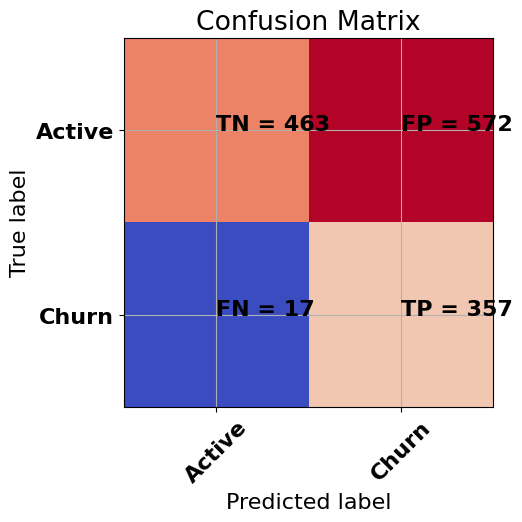

In [ ]:
cm_plot(test_cm)

หาค่า alpha ที่ดีที่สุดในการวิธีการ Laplace smoothing

GridSearchCV จาก scikit-learn เพื่อหาค่า hyperparameter ที่ดีที่สุด ของโมเดล Complement Naive Bayes (ComplementNB) โดยใช้ balanced accuracy เป็นเกณฑ์ในการวัดผล

ทำไมกรณีของ alpha ใน Naive Bayes จึงมักใช้ Grid Search

1. พารามิเตอร์มีน้อยมาก

ใน ComplementNB หรือ MultinomialNB พารามิเตอร์หลักที่ปรับจริง ๆ มีแค่ alpha (และบางครั้ง fit_prior, norm)
ดังนั้นจำนวน combination ไม่เยอะ เช่น:

param_grid = {'alpha': [0.01, 0.1, 0.5, 1, 2, 5]}


แปลว่า Grid Search จะลองแค่ 6 ค่าเท่านั้น → เราทำ exhaustive search ได้สบาย ไม่เปลืองเวลา

2. ค่าที่เหมาะสมของ alpha มักไม่ต่อเนื่อง

ค่า alpha ที่ดีมักอยู่ในระดับ log scale (เช่น 0.001 → 0.01 → 0.1 → 1 → 10)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 0.5, 1, 2, 5, 10]}
grid = GridSearchCV(ComplementNB(), param_grid, cv=5, scoring='recall')
grid.fit(X_train, y_train)

print("Best alpha:", grid.best_params_)
print("Best Balanced Accuracy:", grid.best_score_)

Best alpha: {'alpha': 0.01}
Best Balanced Accuracy: 0.7538461538461539


742 คนถูกทำนายถูกว่า “อยู่ต่อ”

278 คนถูกทำนายถูกว่า “จะยกเลิกบริการ”

แต่มี 96 คน ที่ “ยกเลิกจริงแต่โมเดลทำนายผิดว่าอยู่ต่อ” → false negative

และมี 293 คน ที่ “ไม่ได้ยกเลิกแต่โมเดลทำนายผิดว่าออก” → false positive

| Metric                | Value  | Interpretation                                                                                                                          |
| :-------------------- | :----- | :-------------------------------------------------------------------------------------------------------------------------------------- |
| **Accuracy**          | 72.39% | โมเดลทำนายถูกต้องโดยรวมประมาณ **72%** ของข้อมูลทั้งหมด                                                                                  |
| **Balanced Accuracy** | 73.01% | เมื่อคำนึงถึงทั้งสองคลาส (ลูกค้าอยู่ / ลูกค้าลาออก) อย่างเท่าเทียม โมเดลมีความแม่นยำโดยเฉลี่ยประมาณ **73%** ซึ่งถือว่า **สมดุลพอสมควร** |
| **Conclusion**        |        | Naive Bayes สามารถจำแนกกลุ่มลูกค้าที่จะอยู่ต่อและที่จะยกเลิกบริการได้ในระดับ **ปานกลาง (moderate performance)**                         |


| Metric        | Class 0 (Stay) | Class 1 (Churn) | Interpretation                                                                                     |
| :------------ | :------------: | :-------------: | :------------------------------------------------------------------------------------------------- |
| **Precision** |      0.89      |       0.49      | ในบรรดาลูกค้าที่โมเดลทำนายว่า *“จะ churn”* มีเพียง **49% ที่ churn จริง** → false positive ยังเยอะ |
| **Recall**    |      0.72      |       0.74      | โมเดลจับได้ลูกค้าที่ churn จริงประมาณ **74%** ซึ่งถือว่าค่อนข้างดี                                 |
| **F1-score**  |      0.79      |       0.59      | สมดุลระหว่าง precision–recall ดีกว่าใน class 0 (อยู่ต่อ)                                           |
| **Support**   |      1035      |       374       | มีลูกค้าอยู่มากกว่าลูกค้าที่ churn → ข้อมูล **ไม่สมดุลเล็กน้อย (imbalanced)**                      |


สรุป:  
โมเดลสามารถแยกกลุ่ม ลูกค้าอยู่ (Class 0) ได้แม่นยำมาก (precision สูงถึง 0.89)

แต่ในกลุ่ม ลูกค้าที่จะยกเลิกบริการ (Class 1) แม้ recall จะดี (0.74)
→ แต่ precision ต่ำ แปลว่า ทำนายเกินไปบางส่วน (จับ churn เยอะเกินจริง)

# **K-nearest neighbors**

1.   เหมาะกับข้อมูลที่ผ่านการ scaling และ transformation แล้ว:  
→ log-transform + StandardScaler แล้ว → ทำให้ระยะทาง Euclidean ใช้งานได้แม่นยำขึ้น

2.   เข้าใจง่าย และเห็นผลชัดจากกราฟ K vs Accuracy:  
→ สามารถเลือกจำนวนเพื่อนบ้าน (K) ที่เหมาะสม เพื่อควบคุมระดับการ generalize

3.   สามารถปรับระดับความซับซ้อนได้ด้วยค่า K:  
→ K น้อย = จำข้อมูลละเอียด (อาจ overfit):  
→ K มาก = เฉลี่ยข้อมูลมากขึ้น (generalize ดีขึ้น)

import library

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

Scaling ข้อมูลให้เหมาะกับ KNN:  
KNN อ่อนไหวต่อสเกลของข้อมูลมาก เพราะใช้ระยะห่าง Euclidean distance

In [ ]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges_Log']
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'
)

In [ ]:
X_train_scal = preprocessor.fit_transform(X_train)
X_test_scal = preprocessor.transform(X_test)

In [ ]:
X_train_scal

array([[ 1.45317217,  0.49156592,  1.0670706 , ...,  1.        ,
         0.        ,  0.        ],
       [-1.23302806,  0.49322556, -1.20715389, ...,  0.        ,
         0.        ,  1.        ],
       [-0.58182801, -0.67848153, -0.18161229, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.53457218,  1.66493265,  1.2867529 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.06937205,  1.33798322,  0.80780001, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.88337212,  1.07575982,  1.02713304, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
X_test_scal

array([[ 1.12757214, -0.50919807,  0.66565533, ...,  1.        ,
         0.        ,  0.        ],
       [-1.27372806, -0.69009902, -1.98951039, ...,  0.        ,
         0.        ,  1.        ],
       [-0.66322801,  0.50318341,  0.13735114, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.37177216, -1.50830241,  0.1235759 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.84267212,  0.41854168,  0.89311724, ...,  0.        ,
         0.        ,  0.        ],
       [-1.23302806, -1.46515172, -2.06932388, ...,  0.        ,
         0.        ,  1.        ]])

หาค่า K ที่เหมาะสมที่สุด

In [ ]:
acc_tr, acc_te = [], []
K_range = range(1, 51)

for k in K_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')  # ใช้ถ่วงน้ำหนักตามระยะทาง
    knn.fit(X_train_scal, y_train)

    pred_train = knn.predict(X_train_scal)
    pred_test = knn.predict(X_test_scal)

    acc_tr.append(accuracy_score(y_train, pred_train) * 100)
    acc_te.append(accuracy_score(y_test, pred_test) * 100)

แสดงผลการเลือก K

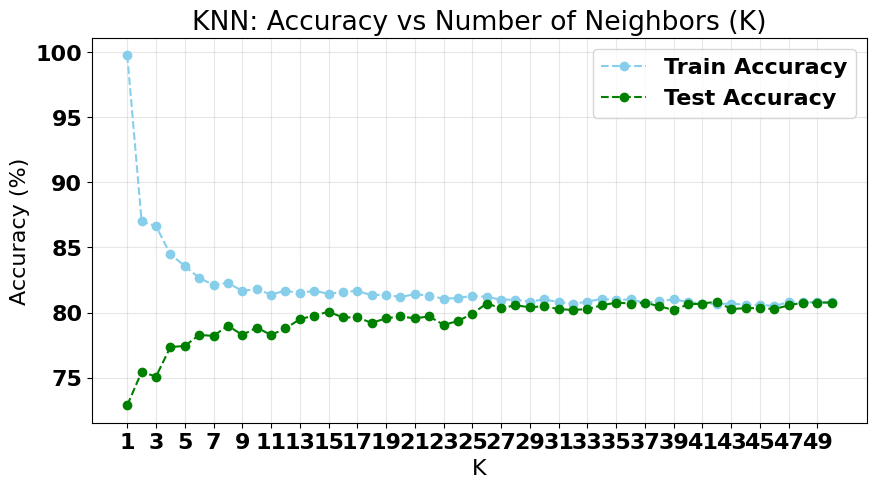

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(K_range, acc_tr, color='skyblue', linestyle='dashed', marker='o', label='Train Accuracy')
plt.plot(K_range, acc_te, color='green', linestyle='dashed', marker='o', label='Test Accuracy')
plt.title('KNN: Accuracy vs Number of Neighbors (K)')
plt.xlabel('K')
plt.ylabel('Accuracy (%)')
plt.xticks(np.arange(1, 51, 2))
plt.legend()
plt.grid(alpha=0.3)
plt.show()

เลือก K ที่ดีที่สุด (จากค่า accuracy สูงสุดของ test set)

In [ ]:
import numpy as np

acc_te_arr = np.array(acc_te)
# หา index ที่อยู่ในช่วง 95% ของ Accuracy สูงสุด
threshold = 0.995 * acc_te_arr.max()
stable_k = [k for k, acc in zip(K_range, acc_te_arr) if acc >= threshold]

print(f"Highest Test Accuracy = {acc_te_arr.max():.2f}%")
print(f"Candidate K (within 0.5% of best): {stable_k}")
best_k = stable_k[0]  # ใช้ค่าเล็กสุดในช่วงเสถียร
print(f"Recommended K = {best_k}")


Highest Test Accuracy = 80.84%
Candidate K (within 0.5% of best): [26, 28, 30, 34, 35, 36, 37, 38, 40, 41, 42, 47, 48, 49, 50]
Recommended K = 26


Evaluate

In [ ]:
knn_best = KNeighborsClassifier(n_neighbors=26, weights='uniform')
knn_best.fit(X_train_scal, y_train)
Knn_y_pred_test = knn_best.predict(X_test_scal)

In [ ]:
test_acc = accuracy_score(y_test, Knn_y_pred_test) * 100
test_bl_acc = balanced_accuracy_score(y_test, Knn_y_pred_test) * 100
test_cm = confusion_matrix(y_test, Knn_y_pred_test)
test_report = classification_report(y_test, Knn_y_pred_test)

print(f"Test set | Accuracy: {test_acc:.2f}%")
print(f"Test set | Balanced Accuracy: {test_bl_acc:.2f}%")
print("\nConfusion Matrix:\n", test_cm)
print("\nClassification Report:\n", test_report)

Test set | Accuracy: 80.70%
Test set | Balanced Accuracy: 72.17%

Confusion Matrix:
 [[935 100]
 [172 202]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.67      0.54      0.60       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



Visualize

KNN Confusion Matrix (k=26)


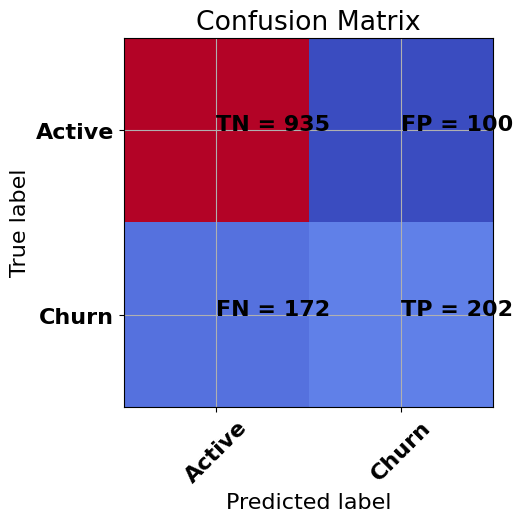

In [ ]:
# Ensure the cm_plot function is defined in the current runtime
# (Re-running the cell that defines cm_plot if necessary)

print(f"KNN Confusion Matrix (k={best_k})")
cm_plot(test_cm)

โมเดลสามารถจำแนก “ลูกค้าที่อยู่ต่อ” ได้อย่างแม่นยำ (True Negative = 935)

สามารถจำแนก “ลูกค้าที่จะยกเลิกบริการ” ได้บางส่วน (True Positive = 202)

แต่ยังมี ลูกค้าที่ churn จริงแต่ทำนายผิด 172 คน (False Negative)
หมายความว่ามีลูกค้าบางส่วนที่ “โมเดลมองข้าม” และอาจไม่ได้รับการช่วยเหลือก่อนออกจากระบบ

| Metric        | Class 0 (Stay) | Class 1 (Churn) | Interpretation                                                             |
| :------------ | :------------: | :-------------: | :------------------------------------------------------------------------- |
| **Precision** |      0.84      |       0.67      | เมื่อโมเดลทำนายว่า “จะ churn” มีความถูกต้องราว **67%**                     |
| **Recall**    |      0.90      |       0.54      | โมเดลสามารถจับลูกค้าที่ churn จริงได้ประมาณ **54%**                        |
| **F1-score**  |      0.87      |       0.60      | สมดุลของ precision–recall ดีกว่าฝั่ง stay มาก                              |
| **Support**   |      1035      |       374       | มีลูกค้าอยู่มากกว่าลูกค้าที่ churn ซึ่งทำให้โมเดล bias ไปทางฝั่ง stay บ้าง |


แปลว่าโดยรวมแล้ว โมเดลสามารถทำนายผลได้ถูกต้องประมาณ 81% ของข้อมูลทั้งหมด และเมื่อนำค่าความแม่นยำของทั้งสองคลาส (อยู่ต่อ / ยกเลิกบริการ) มาหาค่าเฉลี่ยแบบถ่วงน้ำหนัก ความแม่นยำเฉลี่ยอยู่ที่ 72% ซึ่งถือว่าค่อนข้างดีสำหรับโมเดลประเภทนี้

โดยสรุป KNN แสดงให้เห็นว่า มีความสามารถในการจำแนกข้อมูลได้แม่นยำในภาพรวม แต่ยังมีแนวโน้มที่จะ พลาดลูกค้าที่จะยกเลิกบริการ (churn) อยู่บ้าง

# **Logistic**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.describe()

,tenure,MonthlyCharges,TotalCharges_Log
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,6.932543
std,24.559481,30.090047,1.569371
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,5.990339
50%,29.000000,70.350000,7.241044
75%,55.000000,89.850000,8.239488
max,72.000000,118.750000,9.069445


drop TotalCharges_log เพราะ TotalCharges_log มาจาก MonthlyCharges * tenure

เราจึงลบออกเพื่อลบปัญหา Multicolinearity

In [ ]:
df = df.drop(columns=['TotalCharges_Log'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
X_vif = df[['tenure','MonthlyCharges']]  # numeric features เท่านั้น
X_vif = X_vif.fillna(0)          # เติม missing เพื่อคำนวณ VIF

vif_data = pd.DataFrame()
vif_data['feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data)

          feature       VIF
0          tenure  2.612607
1  MonthlyCharges  2.612607


VIF น้อยกว่า 10 แปลว่า not multilinearlity

In [ ]:
col_to_drop = 'TotalCharges_Log'

X_train_LR = X_train.drop(col_to_drop, axis=1)
X_test_LR = X_test.drop(col_to_drop, axis=1)

drop TotalCharges_log ออกจาก X_train เพราะ เทสแล้วแก้ปัญหา multicolinearity

In [ ]:
numerical_features = ['tenure', 'MonthlyCharges']
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'
)
X_train_scal_LR = preprocessor.fit_transform(X_train)
X_test_scal_LR = preprocessor.transform(X_test)

In [ ]:
# สร้างและเทรน Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg.fit(X_train_scal_LR, y_train)

# ทำนายผล
LR_y_pred_test = log_reg.predict(X_test_scal_LR)
LR_y_pred_prob_test = log_reg.predict_proba(X_test_scal_LR)[:,1]

In [ ]:
# Evaluation
acc = accuracy_score(y_test, LR_y_pred_test)
roc_auc = roc_auc_score(y_test, LR_y_pred_prob_test)
print(f'Accuracy: {acc:.3f}')
print(f'ROC-AUC: {roc_auc:.3f}\n')
print("Classification Report:\n", classification_report(y_test, LR_y_pred_test))


Accuracy: 0.811
ROC-AUC: 0.856

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1035
           1       0.68      0.54      0.60       374

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



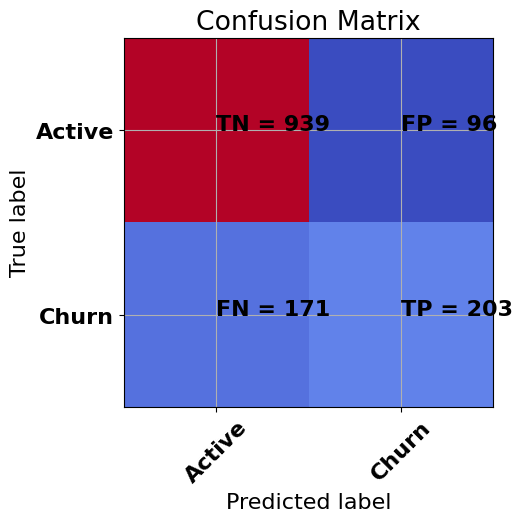

In [ ]:
# Confusion Matrix
test_cm = confusion_matrix(y_test,LR_y_pred_test)
cm_plot(test_cm)

Best threshold = 0.918, AUC = 0.850


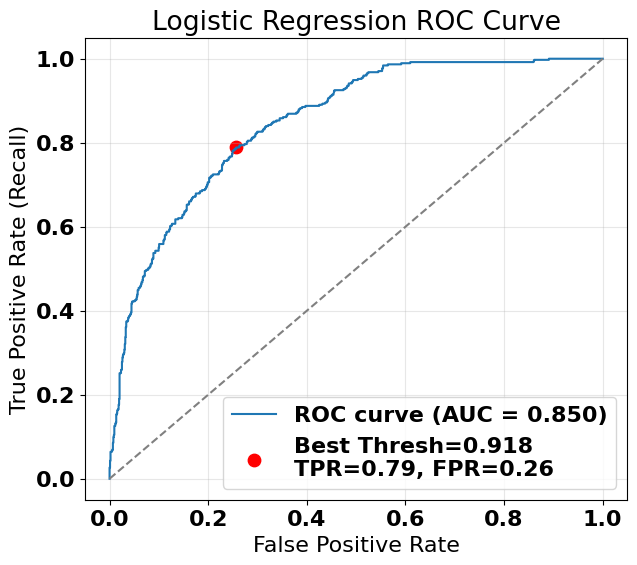

In [ ]:
# คำนวณ Probabilities ของ class 1
y_probs = log_reg.predict_proba(X_test_scal)[:, 1]

# สร้าง ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Youden’s J เพื่อหาค่า threshold ที่ดีที่สุด
youden = tpr - fpr
best_idx = np.argmax(youden)
best_threshold = thresholds[best_idx]

print(f"Best threshold = {best_threshold:.3f}, AUC = {roc_auc:.3f}")

# วาด ROC curve
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0,1],[0,1],'--',color='gray')
plt.scatter(fpr[best_idx], tpr[best_idx], color='red', s=80,
            label=f'Best Thresh={best_threshold:.3f}\nTPR={tpr[best_idx]:.2f}, FPR={fpr[best_idx]:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Classification Report (Test set, adjusted threshold):
              precision    recall  f1-score   support

           0     0.9068    0.7430    0.8168      1035
           1     0.5258    0.7888    0.6310       374

    accuracy                         0.7551      1409
   macro avg     0.7163    0.7659    0.7239      1409
weighted avg     0.8057    0.7551    0.7675      1409



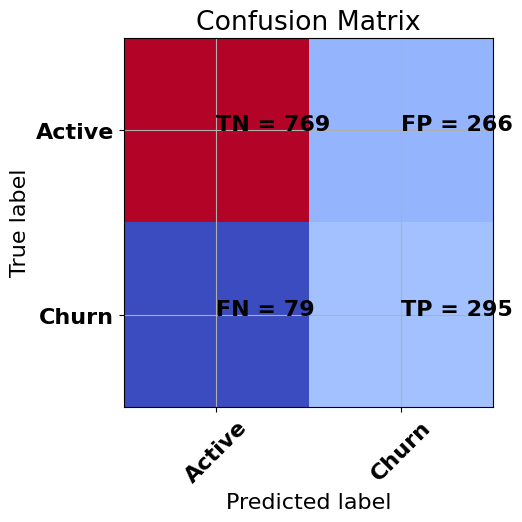

In [ ]:
# ทำนายด้วย threshold ที่ดีที่สุด
y_pred_thresh = (y_probs >= best_threshold).astype(int)

print("\nClassification Report (Test set, adjusted threshold):")
print(classification_report(y_test, y_pred_thresh, digits=4))

test_cm = confusion_matrix(y_test,y_pred_thresh)
cm_plot(test_cm)

# **Evaluation**

Prediction

In [ ]:
DTy_pred_train = dctmodels[4].predict(X_train)
DTy_pred_test  = dctmodels[4].predict(X_test)
xgb_y_pred_train = best_xgb.predict(X_train)
xgb_y_pred_test  = best_xgb.predict(X_test)
rf_y_pred_train =  rf.predict(X_train)
rf_y_pred_test =  rf.predict(X_test)
nb_y_pred_train = nb_model.predict(X_train)
nb_y_pred_test = nb_model.predict(X_test)
Knn_y_pred_train = knn_best.predict(X_train_scal)
Knn_y_pred_test = knn_best.predict(X_test_scal)
LR_y_pred_train = log_reg.predict(X_train_scal_LR)
LR_y_pred_test = log_reg.predict(X_test_scal_LR)

model_name = ['Decision_Tree', 'XGBoost', 'Random_Forest','Naive_Bayes', 'KNN', 'Logistic_Regression']
pred = [DTy_pred_test, xgb_y_pred_test, rf_y_pred_test, nb_y_pred_test, Knn_y_pred_test, LR_y_pred_test]

### Accuracy

In [ ]:
# Define function accuracy
Acc = lambda predict : accuracy_score(y_test,predict)*100

# Apply function to each prediction in pred list.
Accuracy = list(map(Acc, pred))

# Match model name and Accuracy
Accuracy = zip(model_name, Accuracy)

# Sort by Accuracy
Accuracy = sorted(Accuracy, key = lambda x: x[1], reverse = True)
[print('Model: {:20} Accuracy: {:.2f}'.format(*pair)) for pair in Accuracy];

Model: Logistic_Regression  Accuracy: 81.05
Model: KNN                  Accuracy: 80.70
Model: XGBoost              Accuracy: 76.44
Model: Random_Forest        Accuracy: 76.37
Model: Decision_Tree        Accuracy: 73.39
Model: Naive_Bayes          Accuracy: 58.20


### Balance Accuracy

In [ ]:
B_Acc = lambda pred : balanced_accuracy_score(y_test,pred)*100
balanced_accuracy = list(map(B_Acc, pred))
balanced_accuracy = zip(model_name, balanced_accuracy)
balanced_accuracy = sorted(balanced_accuracy, key = lambda x: x[1], reverse = True)

[print('Model: {:20} balanced_accuracy: {:.2f}'.format(*pair)) for pair in balanced_accuracy];

Model: XGBoost              balanced_accuracy: 78.07
Model: Random_Forest        balanced_accuracy: 77.34
Model: Decision_Tree        balanced_accuracy: 76.25
Model: Logistic_Regression  balanced_accuracy: 72.50
Model: KNN                  balanced_accuracy: 72.17
Model: Naive_Bayes          balanced_accuracy: 70.09


### Precision

In [ ]:
Pc = lambda pred : precision_score(y_test,pred)*100
precision = list(map(Pc, pred))
precision = zip(model_name, precision)
precision = sorted(precision, key = lambda x: x[1], reverse = True)

[print('Model: {:20} precision: {:.2f}'.format(*pair)) for pair in precision];

Model: Logistic_Regression  precision: 67.89
Model: KNN                  precision: 66.89
Model: Random_Forest        precision: 53.71
Model: XGBoost              precision: 53.70
Model: Decision_Tree        precision: 49.92
Model: Naive_Bayes          precision: 38.43


### Recall

In [ ]:
rc = lambda pred : recall_score(y_test,pred)*100
recall = list(map(rc, pred))
recall = zip(model_name, recall)
recall = sorted(recall, key = lambda x: x[1], reverse = True)

[print('Model: {:20} recall: {:.2f}'.format(*pair)) for pair in recall];

Model: Naive_Bayes          recall: 95.45
Model: Decision_Tree        recall: 82.35
Model: XGBoost              recall: 81.55
Model: Random_Forest        recall: 79.41
Model: Logistic_Regression  recall: 54.28
Model: KNN                  recall: 54.01


จากการเปรียบเทียบพบว่า **XGBoost ให้ผลลัพธ์โดยรวมดีที่สุด** เมื่อพิจารณาจากทั้งค่า Balance Accuracy และ Recall


แม้ว่า Decision Tree จะมีค่า Recall สูงกว่าเล็กน้อย แต่โมเดล XGBoost แสดงให้เห็นถึง
Balance Accuracy Precision และ Accuracy โดยรวมดีกว่า Decision Tree


ดังนั้น XGBoost จึงเป็นโมเดลที่มี ความสมดุลระหว่าง Accuracy และ Recall
เหมาะที่สุดสำหรับนำไปใช้งานจริงในCustomer Churn Prediction

โดยมีค่า Accuracy อยู่ที่ 76% และ Recall 82% ปล่อยให้ลูกค้าหลุดไปเพียง 69 คน จาก 1,409 คนในชุดทดสอบ

Test set | Accuracy is 76.43718949609652
Test set | Balance Accuracy is 78.07008705985689


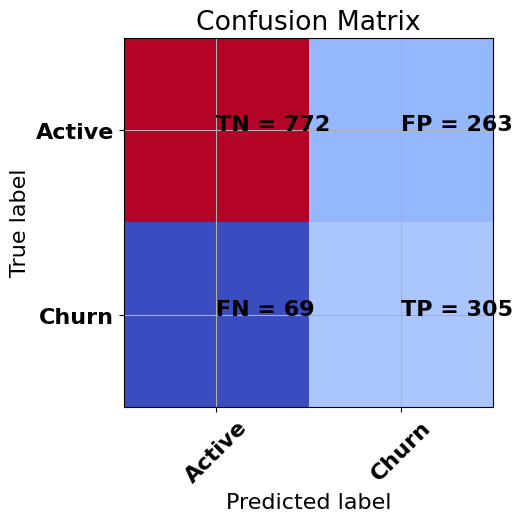

              precision    recall  f1-score   support

           0       0.92      0.75      0.82      1035
           1       0.54      0.82      0.65       374

    accuracy                           0.76      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.82      0.76      0.78      1409



In [ ]:
test_acc = accuracy_score(y_test,xgb_y_pred_test)*100
test_bl_acc = balanced_accuracy_score(y_test,xgb_y_pred_test)*100
test_cm = confusion_matrix(y_test,xgb_y_pred_test)
test_report = classification_report(y_test,xgb_y_pred_test)

print("Test set | Accuracy is", test_acc)
print("Test set | Balance Accuracy is", test_bl_acc)
cm_plot(test_cm)
print(test_report)

# **Neural Network**


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.19.0


In [ ]:
! pip install keras_metrics

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras.optimizers import Adam
import keras_metrics as eval_matrics

from numpy.random import seed

Scale ข้อมูลโดยฌฉพาะข้อมูลประเภท Numerical

In [ ]:
# Identify numerical and categorical columns
# 'TotalCharges' is now log-transformed but still needs scaling
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges_Log']
categorical_features = [col for col in X.columns if col not in numeric_features]

print(f"Numeric features: {numeric_features}")
print(f"Categorical features: {categorical_features}\n")

# Create a transformer for numeric features
# Neural networks are VERY sensitive to feature scale, so StandardScaler is essential
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create a transformer for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

Numeric features: ['tenure', 'MonthlyCharges', 'TotalCharges_Log']
Categorical features: ['gender_Male', 'SeniorCitizen_Yes', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']



In [ ]:
input_dims = X_train_processed.shape[1]
output_dims = 1
print(input_dims)
print(output_dims)

57
1


In [ ]:
model = Sequential()
model.add(Input(shape=(input_dims,), name="Input_Layer"))
model.add(Dense(16, activation='relu', name="Hidden_Layer_1"))
model.add(Dense(8, activation='relu', name="Hidden_Layer_2"))
model.add(Dense(1, activation='sigmoid', name="Output_Layer")) # Sigmoid
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)          │ (None, 16)             │           928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,073 (4.19 KB)

 Trainable params: 1,073 (4.19 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_train_processed.shape

(5634, 57)

**Train Model**
- __Epoch__ : a single step in training a neural network; One Epoch is when an entire dataset is passed forward through the neural network.
- __Batch Size__ : Total number of training examples pass into the neural net at once.
- __Verbose__ : Show the training progress for each epoch. (0 : nothing, 1: show process with animated progress bar , 2 :show process without animated progress bar



In [ ]:
epochs = 100
batch_size = 32

# Compile the model
model.compile(
    optimizer=Adam(), # Using the Adam optimizer imported from keras.optimizers
    loss='binary_crossentropy', # Appropriate loss function for binary classification
    metrics=['accuracy', # Standard accuracy metric
               tf.keras.metrics.Recall(name='recall'), # Recall metric
               tf.keras.metrics.Precision(name='precision')] # Precision metric
)

nn = model.fit(X_train_processed, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_test_processed, y_test),
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)])


Epoch 1/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7619 - loss: 0.4927 - precision: 0.6361 - recall: 0.1737 - val_accuracy: 0.7970 - val_loss: 0.4219 - val_precision: 0.6486 - val_recall: 0.5134
Epoch 2/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8040 - loss: 0.4226 - precision: 0.6515 - recall: 0.5392 - val_accuracy: 0.7963 - val_loss: 0.4124 - val_precision: 0.6570 - val_recall: 0.4866
Epoch 3/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8086 - loss: 0.4103 - precision: 0.6802 - recall: 0.5419 - val_accuracy: 0.8020 - val_loss: 0.4089 - val_precision: 0.6715 - val_recall: 0.4973
Epoch 4/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8023 - loss: 0.4164 - precision: 0.6578 - recall: 0.5127 - val_accuracy: 0.8027 - val_loss: 0.4099 - val_precision: 0.6860 - val_recall: 0.4733
Epoch 5/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8133 - loss: 0.4129 - precision: 0.7000 - recall: 0.5533 - val_accuracy: 0.8013 - val_los

Prediction

In [ ]:
# Keras .predict() จะให้ค่า probability
y_pred_proba = model.predict(X_test_processed).flatten()
# แปลง probability เป็น class (0 หรือ 1) โดยใช้เกณฑ์ 0.5
nn_pred_test = (y_pred_proba > 0.5).astype(int)
print(f"Accuracy: {accuracy_score(y_test, nn_pred_test):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, nn_pred_test):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, nn_pred_test, target_names=["No Churn", "Churn"]))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.8084
Balanced Accuracy: 0.7219

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.84      0.91      0.87      1035
       Churn       0.67      0.54      0.60       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



Accuracy สูง แต่ Recall(Churn) = 0.52 ถือว่าต่ำ เราต้องการตรวจสอบว่า Churn rate พบบ่อยแค่ไหนเลยต้องการเพื่ม Recall

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))
print(class_weights)

{0: np.float64(0.6805991785455424), 1: np.float64(1.8842809364548494)}


balanced weight ค่า churn เพราะว่าใน raw data -> No Churn > Churn ดังนั้น Recall(churn) เลยน้อย

In [ ]:
model = Sequential()
model.add(Input(shape=(input_dims,), name="Input_Layer"))
model.add(Dense(16, activation='relu', name="Hidden_Layer_1"))
model.add(Dense(8, activation='relu', name="Hidden_Layer_2"))
model.add(Dense(1, activation='sigmoid', name="Output_Layer")) # Sigmoid
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)          │ (None, 16)             │           928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,073 (4.19 KB)

 Trainable params: 1,073 (4.19 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(
    optimizer=Adam(5e-4), # Using the Adam optimizer imported from keras.optimizers
    loss='binary_crossentropy', # Appropriate loss function for binary classification
    metrics=['accuracy', # Standard accuracy metric
               tf.keras.metrics.Recall(name='recall'), # Recall metric
               tf.keras.metrics.Precision(name='precision')] # Precision metric
)

nn = model.fit(
    X_train_processed, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test_processed, y_test),
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)],
    class_weight=class_weights
)


Epoch 1/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6535 - loss: 0.6558 - precision: 0.3781 - recall: 0.5052 - val_accuracy: 0.7239 - val_loss: 0.5422 - val_precision: 0.4870 - val_recall: 0.7513
Epoch 2/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7461 - loss: 0.5210 - precision: 0.5187 - recall: 0.7592 - val_accuracy: 0.7388 - val_loss: 0.5232 - val_precision: 0.5052 - val_recall: 0.7861
Epoch 3/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7616 - loss: 0.4922 - precision: 0.5322 - recall: 0.7785 - val_accuracy: 0.7495 - val_loss: 0.4958 - val_precision: 0.5189 - val_recall: 0.7701
Epoch 4/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7593 - loss: 0.4847 - precision: 0.5222 - recall: 0.7694 - val_accuracy: 0.7566 - val_loss: 0.4733 - val_precision: 0.5295 - val_recall: 0.7433
Epoch 5/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7723 - loss: 0.4788 - precision: 0.5452 - recall: 0.7811 - val_accuracy: 0.7488 - val_los

In [ ]:
# Keras .predict() จะให้ค่า probability
y_pred_proba = model.predict(X_test_processed).flatten()
# แปลง probability เป็น class (0 หรือ 1) โดยใช้เกณฑ์ 0.5
nn_pred_test = (y_pred_proba > 0.5).astype(int)
print(f"Accuracy: {accuracy_score(y_test, nn_pred_test):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, nn_pred_test):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, nn_pred_test, target_names=["No Churn", "Churn"]))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.7736
Balanced Accuracy: 0.7588

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.89      0.79      0.84      1035
       Churn       0.56      0.73      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409



Generate Plots

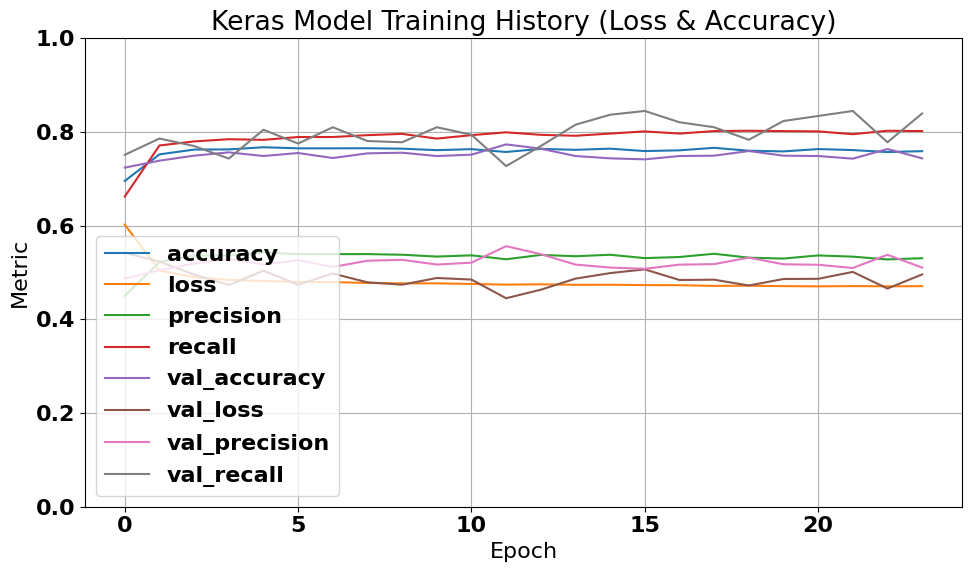

In [ ]:
pd.DataFrame(nn.history).plot(figsize=(10, 6))
plt.grid(True)
plt.title('Keras Model Training History (Loss & Accuracy)')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.gca().set_ylim(0, 1) # จำกัดแกน Y ให้อยู่ระหว่าง 0-1
plt.tight_layout()

Confusion Matrix

Test set | Accuracy is 77.35982966643009
Test set | Balance Accuracy is 75.88054457619675

Generating Confusion Matrix plot using cm_plot()...


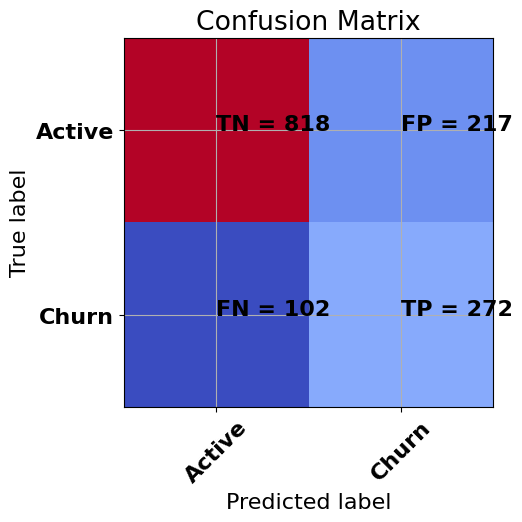

              precision    recall  f1-score   support

    No Churn       0.89      0.79      0.84      1035
       Churn       0.56      0.73      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409



In [ ]:
test_acc = accuracy_score(y_test, nn_pred_test) * 100
test_bl_acc = balanced_accuracy_score(y_test, nn_pred_test) * 100
test_cm = confusion_matrix(y_test, nn_pred_test)
test_report = classification_report(y_test, nn_pred_test, target_names=["No Churn", "Churn"])

print("Test set | Accuracy is", test_acc)
print("Test set | Balance Accuracy is", test_bl_acc)
print("")

# --- CALLING USER'S CUSTOM FUNCTION ---
print("Generating Confusion Matrix plot using cm_plot()...")
cm_plot(test_cm)
print(test_report)

In [ ]:
def plot_metrics(nn,metric):
    plt.figure(figsize=(12, 6))
    plt.rcParams.update({'font.size': 12})
    plt.plot(nn.history[metric])
    plt.plot(nn.history['val_'+ metric])
    plt.title('Model '+ metric)
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')
    plt.show()

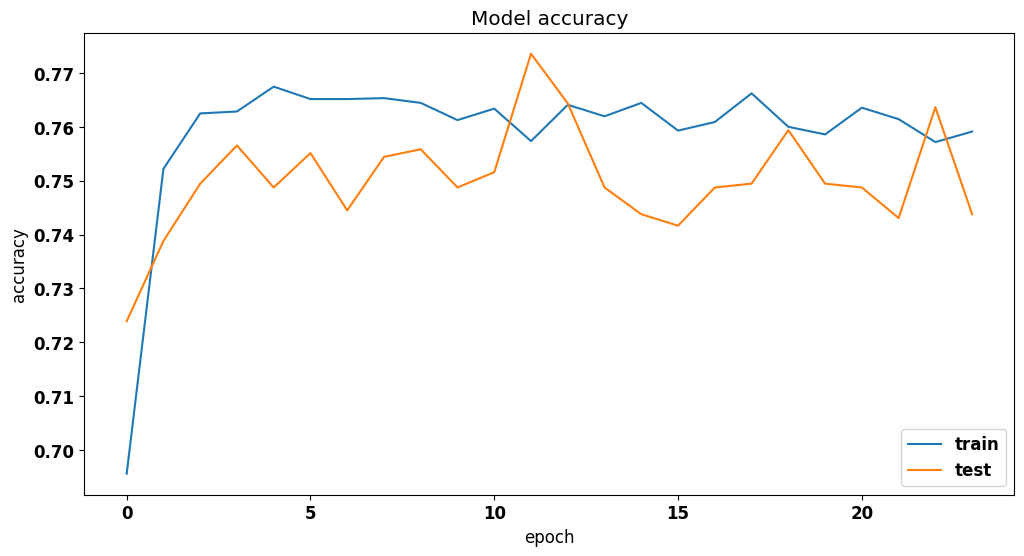

In [ ]:
plot_metrics(nn,'accuracy')

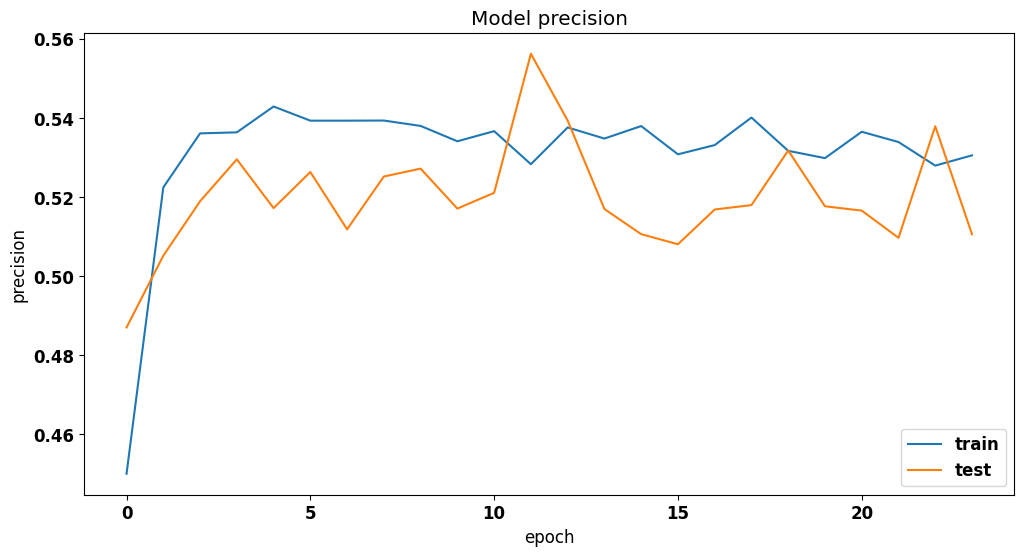

In [ ]:
plot_metrics(nn,'precision')

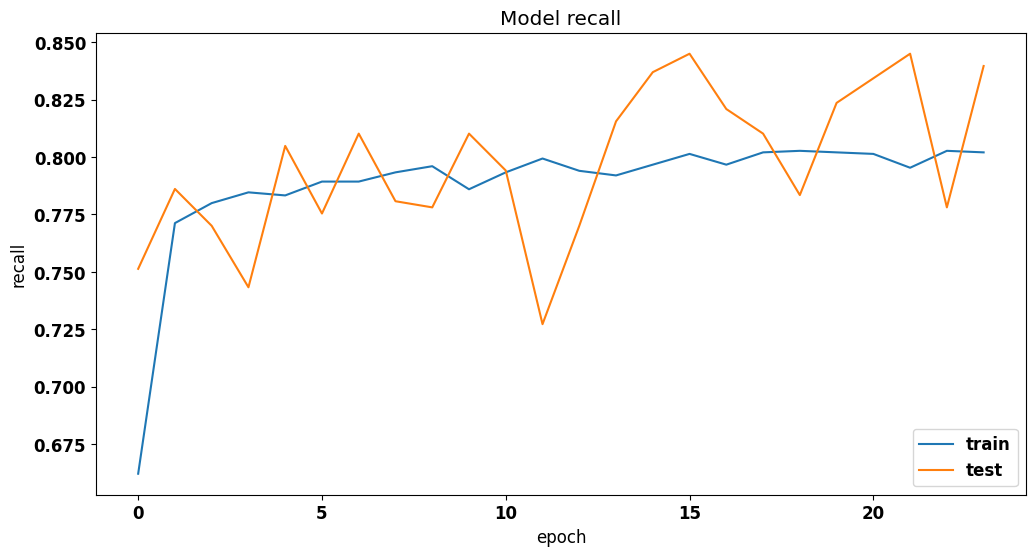

In [ ]:
plot_metrics(nn,'recall')

# **clustering**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_use = df_dummy.copy()   # ถ้า df_dummy ยังมี 'Churn_Yes' อยู่ ให้แยกออกก่อน
if 'Churn_Yes' in df_use.columns:
    churn = df_use['Churn_Yes']
    df_use = df_use.drop(columns=['Churn_Yes'])
else:
    churn = df['Churn'].map({'No':0,'Yes':1}) if 'Churn' in df.columns else None


In [ ]:
features_list = list(df_use.columns)   # หรือระบุเช่น ['tenure','MonthlyCharges','TotalCharges_Log',...]
X = df_use[features_list].copy()


In [ ]:
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=2, random_state=42)
X_pca2 = pca.fit_transform(X_s)
print("Explained variance by 2 PCA:", pca.explained_variance_ratio_.sum())

Explained variance by 2 PCA: 0.4486223286903389


In [ ]:
sse = []
sil = []
K_range = range(2,11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_s)
    sse.append(km.inertia_)
    sil.append(silhouette_score(X_s, labels))

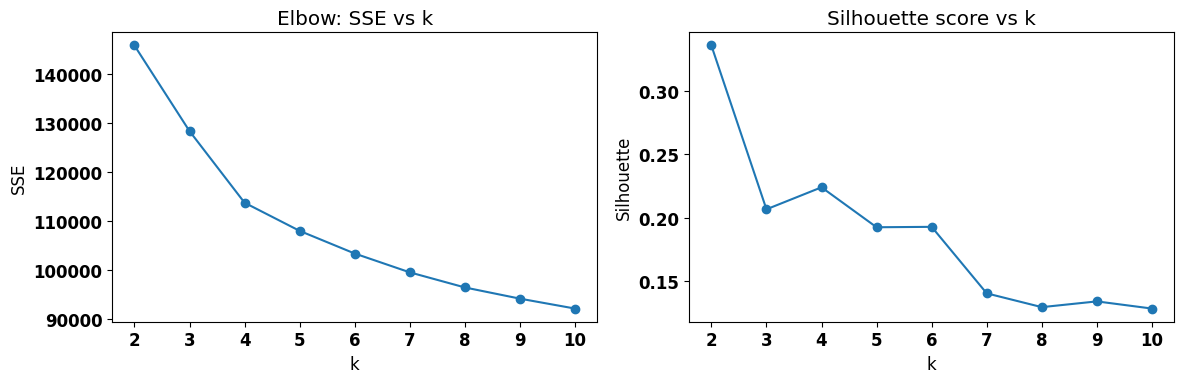

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(K_range, sse, marker='o')
plt.title('Elbow: SSE vs k')
plt.xlabel('k'); plt.ylabel('SSE')
plt.subplot(1,2,2)
plt.plot(K_range, sil, marker='o')
plt.title('Silhouette score vs k')
plt.xlabel('k'); plt.ylabel('Silhouette')
plt.tight_layout()
plt.show()

In [ ]:
k = 4
km = KMeans(n_clusters=k, random_state=42, n_init=30)
labels_km = km.fit_predict(X_s)

In [ ]:
res = pd.DataFrame(X_pca2, columns=['PC1','PC2'])
res['cluster'] = labels_km
if churn is not None:
    res['churn'] = churn.values

print(res['cluster'].value_counts().sort_index())
if 'churn' in res.columns:
    print(res.groupby('cluster')['churn'].agg(['mean','count']).rename(columns={'mean':'churn_rate'}))



cluster
0    2535
1    1526
2    2300
3     682
Name: count, dtype: int64
         churn_rate  count
cluster                   
0          0.478501   2535
1          0.074050   1526
2          0.162174   2300
3          0.249267    682


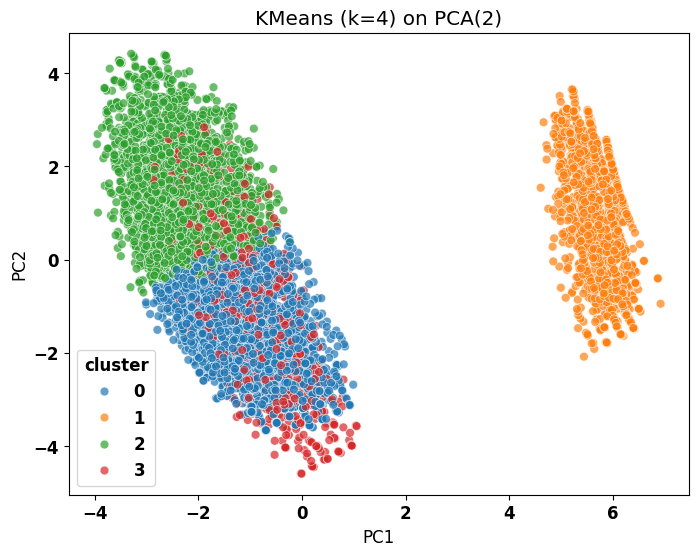

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=res, x='PC1', y='PC2', hue='cluster', palette='tab10', alpha=0.7, s=40)
plt.title(f'KMeans (k={k}) on PCA(2)')
plt.legend(title='cluster')
plt.show()

In [ ]:
Xc = pd.DataFrame(X.values, columns=features_list)
Xc['cluster'] = labels_km
cluster_profile = Xc.groupby('cluster').agg(['mean', 'median']).transpose()
# แสดงตัวอย่าง summary: (ถ้าฟีเจอร์เยอะ ให้เลือก top few)
for cl in sorted(Xc['cluster'].unique()):
    print("Cluster", cl)
    display(Xc[Xc['cluster']==cl].describe().T.head(10))

Cluster 0


,count,mean,std,min,25%,50%,75%,max
cluster,2535.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Cluster 1


,count,mean,std,min,25%,50%,75%,max
cluster,1526.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


Cluster 2


,count,mean,std,min,25%,50%,75%,max
cluster,2300.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0


Cluster 3


,count,mean,std,min,25%,50%,75%,max
cluster,682.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0
